## Материалы

* [Презентация] (https://drive.google.com/file/d/1XD0NP7DuRLjbRDg7Om3qWNkj_euhfTHn/view)

* [Дашборд] (https://public.tableau.com/app/profile/andrey.sergeev/viz/Shop_revenue/sheet2?publish=yes)

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from plotly import graph_objects as go

import datetime as dt

import math

import numpy as np

from scipy import stats as st

from datetime import datetime

import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
google_id = "1DkqEQWZoHh22YrsYcNUxSzlhgFqdl0tf"

shop_df  = pd.read_csv(f"https://drive.google.com/uc?export=download&id={google_id}" )

# Часть 1

# Изучение общей информации <a id="start"></a>

In [ ]:
shop_df.head(30)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [ ]:
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


**В имеющемся в нашем распоряжении датасете 7474 строк и 6 стобцов, названия столбцов в соответстии с змеиным_регистром, среди типов данных есть необходимость привести столбец с датой и временем транзакции к нужному типу. Можно приступать к предобработке.**

# Часть 2

# Предобработка данных <a id="before"></a>

**Для начала приведём поле с даташтампом транзакции к необходиому типу.**

In [ ]:
shop_df['date'] = shop_df['date'].astype(str)

shop_df['date'] = pd.to_datetime(shop_df['date'], format='%Y%m%d%H')

shop_df['date'].head(15)

0    2018-10-01 00:00:00
1    2018-10-01 00:00:00
2    2018-10-01 00:00:00
3    2018-10-01 00:00:00
4    2018-10-01 00:00:00
5    2018-10-01 00:00:00
6    2018-10-01 00:00:00
7    2018-10-01 08:00:00
8    2018-10-01 08:00:00
9    2018-10-01 09:00:00
10   2018-10-01 11:00:00
11   2018-10-01 12:00:00
12   2018-10-01 13:00:00
13   2018-10-01 15:00:00
14   2018-10-01 16:00:00
Name: date, dtype: datetime64[ns]

In [ ]:
shop_df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [ ]:
shop_df.duplicated().sum()

0

**Проверка пропусков и явных дубликатов их не обнаружила. Проверим неявные дубликаты.**

In [ ]:
shop_df.duplicated(subset=['customer_id','order_id','product','quantity','price']).sum()

1864

**Предположительно что идентичные транзакции без учёта времени являются неявными дубликатами. Они могли возникнуть по причине технического сбоя при выгрузке. Задублированные данные не принесут никакой пользы нашему исследованию и поэтому мы можем смело от них избавиться.**

In [ ]:
shop_df = shop_df.sort_values(by='date')

In [ ]:
shop_df = shop_df.drop_duplicates(subset=['customer_id','order_id','product','quantity','price'], keep='first')

**Удаляем дубликаты оставляя только транзакцию которая была первой. Последующие транзакции задублировались. От изначального датасета осталось 5610 строк.**

In [ ]:
shop_df.reset_index(drop=True)

shop_df.shape

(5610, 6)

**Присваиваем новое имя для очищенного от неявных дубликатов датафрейму**

In [ ]:
shop_df_new = shop_df

**Добавим в основной датафрейм поле с суммой каждой транзакции для дальнейших расчётов**

In [ ]:
shop_df_new['good_sum'] = shop_df_new['quantity'] * shop_df_new['price']

shop_df_new.head()

,date,customer_id,order_id,product,quantity,price,good_sum
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0


**Создаём таблицу с суммой и количеством зазказов для дальнейших расчётов**

In [ ]:
group_shop = shop_df_new.groupby('order_id').agg({'good_sum': 'sum', 'customer_id':'nunique'})

group_shop.columns = ['order_sum', 'order_qnt']

group_shop.sort_values(by= ['order_sum'], ascending = False).head(5)

,order_sum,order_qnt
order_id,,
71743,675000.0,1
71668,49432.0,1
69830,47385.0,1
69156,33680.0,1
69504,32718.0,1


**Теперь проверим заказы у которых больше одного покупателя. Так как совместные покупки в нашем магазине не разрешены, то это также как и дубли транзакций - системные ошибки.**

In [ ]:
group_shop.sort_values(by= ['order_qnt'], ascending = False).head(5)

,order_sum,order_qnt
order_id,,
72845,9440.0,4
71480,222.0,3
69485,3635.0,3
69410,132.0,2
71226,1138.0,2


In [ ]:
two_orders_only = group_shop[group_shop['order_qnt'] > 1].reset_index()

two_orders_only['order_qnt'].count()

29

**Таких заказов оказалось 29.**

In [ ]:
two_orders_only = two_orders_only['order_id'].tolist()

wrong_orders = shop_df_new.query('order_id in @two_orders_only')

In [ ]:
#посмотрим на нашего рекордсмена

wrong_orders.query('order_id == 72845')

,date,customer_id,order_id,product,quantity,price,good_sum
6504,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0
6505,2019-10-03 15:00:00,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0
6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,2360.0


**В рекордном по количеству покупателей заказу 4 покупателя и все разные. Удалим их из нашего датасета.**

In [ ]:
shop_df_new = shop_df_new.query('order_id not in @two_orders_only')

**Проверим на выборке из одного заказа что они покинули наш датасет**

In [ ]:
shop_df_new.query('order_id == 72845')

,date,customer_id,order_id,product,quantity,price,good_sum


In [ ]:
shop_df_new = shop_df_new[shop_df_new['order_id'] != 71743]

In [ ]:
shop_df_new.shape

(5543, 7)

In [ ]:
shop_df_new.to_csv (path_or_buf = r' C:\Users\User\bank_scrooge.csv')

In [ ]:
shop_df_new.query('order_id == 71743')

,date,customer_id,order_id,product,quantity,price,good_sum


# Итоги предобработки данных <a id="after"></a>

**По итогам предобработки из 7474 строк осталось 5544 - большинство строк сохранено - это хороший результат. Данные без пропусков и дубликатов. Приступим к исследовательскому анализу.**

# ЧАСТЬ 3

# ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ <a id="eda"></a>

# Категоризация товарных наименований <a id="category"></a>

**Перед тем как проводить анализ - необходимо определиться с категориями товаров которые присутствуют в нашем магазине и провести категоризацию с помощью функции.**

In [ ]:
shop_df_new['product'] = shop_df_new['product'].str.lower()

**Проверим самые наиболее встречающиеся наименования товаров и на их основе создадим словарь**

In [ ]:
product_df = shop_df_new.groupby('product').agg({'quantity':'count'}).reset_index()

display(product_df.sort_values(by='quantity',ascending=False))

,product,quantity
1029,пеларгония розебудная red pandora укорененный ...,65
1027,пеларгония розебудная prins nikolai укорененны...,54
1001,пеларгония зональная диам. 12 см сиреневый пол...,53
1603,сумка-тележка 2-х колесная gimi argo синяя,47
1026,пеларгония розебудная mary укорененный черенок,40
...,...,...
960,"осина обыкновенная, высота 50-100 см",1
959,"осина обыкновенная, высота 25-50 см",1
957,ополаскиватель для посудомоечных машин ludwik ...,1
952,однолетнее растение целозия метельчатая в касс...,1


In [ ]:
#функция

def separator(name):
    dictionary ={
        'Хранение и порядок':['таз', 'сушилка', 'чехол', 'вешалка', 'крючок', 'доска', 'щетка', 'ерш',
                             'подскладка', 'корыто', 'подрукавник','плечики', 'полки', 'подставка', 'швабра',
                             'окномойка', 'универсальное', 'прищепок', 'перчатки', 'стремянка', 'ёрш', 'вешалок', 'стяжка',
                              'совок', 'ведро', 'ящик', 'стеллаж', 'этажерка', 'комод', 'кофр', 'ролик', 'вешалки', 'вантуз'
                             ],
        'Растения':['г','d', 'h', 'с прожилками', 'объем',  'пеларгония', 'в кассете', 'в упаковке', 'в горшке', 'кассета',
                    'в бухте', 'растение', 'рассада', 'петуния', 'герань', 'циперус', 'калибрахоа', 'бакопа',
                   'декабрист', 'фуксия', 'эвкалипт', 'мята', 'афеляндра', 'овсянница', 'базилик', 'тимьян', 'котовник',
                   'настурция', 'арбуз','салатник', 'вербена', 'незабудка', 'смесь', 'мимоза', 'укроп', 'эвкалипт', 'антуриум',
                    'мединилла', 'дыня', 'кашпо', 'алоэ', 'лаванда', 'гвоздика','фуксия', 'калатея', 'мирт', 'томат', 'роза',
                    'клубника', 'ясколка', 'камнеломка', 'фиалка', 'в кассете', 'в упаковке', 'в горшке', 'кассета', 'в бухте',
                    'эхинокактус', 'с прожилками', 'объем', 'цинния', 'космея', 'бархатцы','вербейник', 'тюльпан', 'кипарисовик'
                    'горшок', 'календула', 'гиностемма', 'кипарисовик', 'огурец', 'морковь','эшшольция', 'кодонанта', 'калла',
                    'эцикламен', 'осина', 'цикламен', 'томата'
                   ],
        'Кухни':['нож', 'банка', 'миска', 'измельчитель', 'просеиватель', 'тарелка', 'контейнер', 'вилка',' блюдце',
                  'сковород', 'ложка', 'котел','кружек', 'фужеров', 'кувшин', 'толкушка', 'противень', 'tepмокружка', 'форма',
                 'кружка', 'сотейник', 'ножей', 'орехоколка', 'терка', 'чайный', 'чайная', 'рыбочистка', 'блюдце', 'кастрюля',
                 'форм', 'стакан', 'мантоварка', 'бокалов', 'скребок', 'кисточка', 'картофелемялка', 'скалка',
                 'лопатка', 'пресс', 'электроштопор', 'термос', 'половник' , 'венчик', 'ковш', 'тортница',
                 'скатерть', 'салфетка', 'тряпкодержатель', 'хлебница', 'чайник', 'весы', 'полотенце', 'миксер', 'овощеварка',
                 'полотенец', 'соковарка', 'кипятильник'],
        'Аксессуары':['тележка', 'сумка'],
        'Интерьеры':['муляж', 'композиция', 'ель', 'искусственный', 'искусственная', 'плед', 'простыня', 'подушка', 'коробка',
                    'наматрасник', 'одеяло', 'наволочка' ,'ваза', 'коврик', 'ковер', 'ковёр', 'сидение',
                     'корзина', 'штанга', 'штора', 'дозатор', 'ванной', 'мыло','ванн']
}
    for category,products in dictionary.items():
        for product in products:
            if product in name:
                return category
    return 'Другое'

**Применим функцию к стобцу и проверим корректность работы функции.**

In [ ]:
shop_df_new['goods_category'] = shop_df_new['product'].apply(separator)

In [ ]:
shop_df_new['goods_category'].value_counts()

Растения              3679
Хранение и порядок    1013
Интерьеры              337
Кухни                  244
Аксессуары             214
Другое                  56
Name: goods_category, dtype: int64

# Общие вычисления по датасету <a id="general"></a>

In [ ]:
#количество уникальных наименований

unique_goods =shop_df_new['product'].nunique()

unique_goods

2331

In [ ]:
#количество уникальных пользователей

shop_df_new['customer_id'].nunique()

2412

In [ ]:
#количество уникальных заказов

shop_df_new['order_id'].nunique()

3491

In [ ]:
#таким промежутком времени мы обладаем в данных

min_date = (shop_df_new['date'].min())

max_date =(shop_df_new['date'].max())

period = max_date - min_date

period

Timedelta('487 days 15:00:00')

**Заказов больше чем уникальных клиентов, это уже положительный знак. Период данных также достаточный для анализа 487 дней (больше года).**

# График процента категорий товаров по количеству представленных наименований <a id="quqnty"></a>

In [ ]:
product_table = shop_df_new.groupby(['goods_category']).agg({'product':'nunique'}).reset_index()

product_table.columns = ['goods_category', 'cnt']

product_table['perc'] = round(product_table['cnt']/unique_goods, 2) *100

In [ ]:
#график разбивки по категориям

fig = go.Figure(data=[go.Pie(labels= product_table['goods_category'],
                             values=product_table['perc']),
                    ])


fig.update_layout(title='Процент товаров по количеству представленных товаров категории',
                  annotations=[dict(x=1.05,
                                    y=1.05,
                                    text='Категория',
                                    showarrow=False)])


fig.show()

**Основываясь на этом графике можно утверждать что на большую часть это магазин для растениеводства (60%). Вторую строчку занимает "Хранение и порядок" (21%), остальные категории совсем малы. Проверим что мы имеем по другим показателям.**

# График процента категорий товаров по количеству приобретённых товаров  <a id="goods"></a>

In [ ]:
#число проданных единиц товара за весь период

quan_sum = shop_df_new['quantity'].sum()

In [ ]:
#строим сводную таблицу

category_cnt = shop_df_new.groupby('goods_category').agg({'quantity':'sum'}).reset_index()

category_cnt = category_cnt.sort_values(by='quantity', ascending=False)

category_cnt['perc'] = round(category_cnt['quantity']/quan_sum,2)*100

In [ ]:
#график разбивки по категориям

fig = go.Figure(data=[go.Pie(labels= category_cnt['goods_category'],
                             values=category_cnt['perc']),
                    ])


fig.update_layout(title='Процент приобретённых товаров категории от общего количества',
                  annotations=[dict(x=1.15,
                                    y=1.05,
                                    text='Категория',
                                    showarrow=False)])


fig.show()

**На графике распределения количества приобретённых товаров "Растения" уже не имеют такой перевес, а занимают только 45% от всего количества проданных единиц. На этом графике появился третий лидер "Интерьеры". Представленных артикулов всего 7% от общего числа, но берут их лучше чем другие категории - если смотреть на отношение процента представленных артикулов к проценту
проданных единиц.**

# График процента категорий товаров по сумме выручки <a id="rev"></a>

In [ ]:
#общая сумма выручки

total_income = round(shop_df_new['good_sum'].sum())

total_income

3926279

**Общая сумма выручки составила за период составила около 4 миллионов**

In [ ]:
#таблица для построения графика

category_income = shop_df_new.groupby('goods_category').agg({'good_sum':'sum'}).reset_index()

category_income['good_sum'] = round(category_income['good_sum'])

category_income['perc'] = round(category_income['good_sum']/total_income,2)*100

In [ ]:
#график разбивки по категориям

fig = go.Figure(data=[go.Pie(labels= category_income['goods_category'],
                             values=category_income['perc']),
                    ])


fig.update_layout(title='Процент выручки по категории от общего количества выручки',
                  annotations=[dict(x=1.15,
                                    y=1.05,
                                    text='Категория',
                                    showarrow=False)])


fig.show()

**По проценту выручки с категориии у растений уже только 42%, получается что у самой многочисленно представленной и продаваемой выручка составляет только 40% от общей. Близко к ней располжена категория "Хранение и порядок". Примечательно что здесь присутствует категория "Аксессуары" - это тележки и сумки к ним - здесь они оказались благодаря своей стоимости - их немного,
продаются они нечасто, но зато приносят 10% выручки.**

# График ТОП-10 самых популярных товаров <a id="ten"></a>

**Для графика популярности товаров построим сводную таблицу**

In [ ]:
shop_df_new['product'] = shop_df_new['product'].str.capitalize()

In [ ]:
top_10_product = shop_df_new.groupby(['product','goods_category']).agg({'quantity':'sum'}).reset_index()

top_10_product = top_10_product.sort_values(by='quantity', ascending=False)

top_10_product = top_10_product.head(10)

In [ ]:
sns.set_palette('muted')

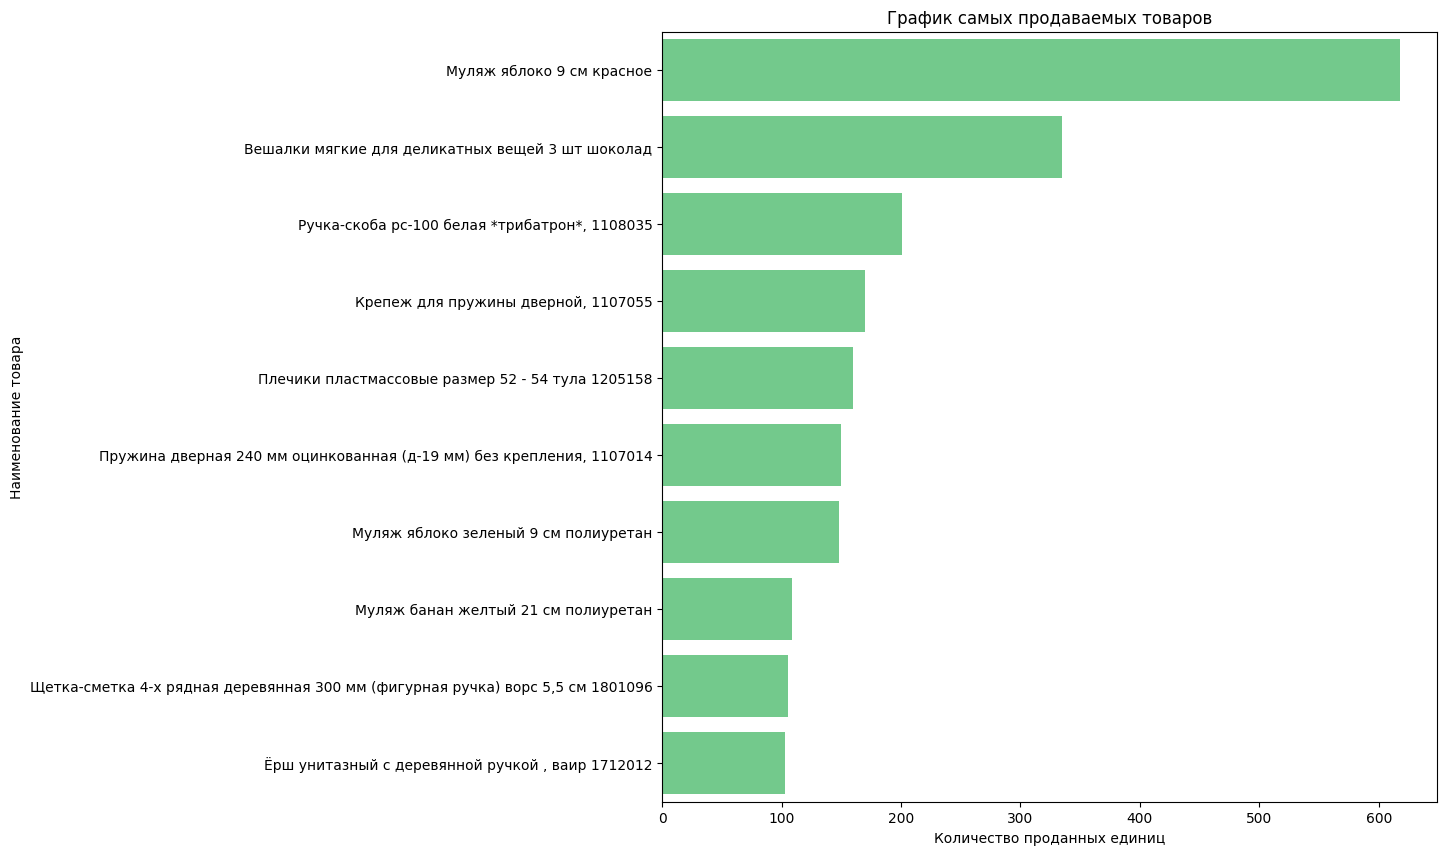

In [ ]:
#строим график

plt.figure(figsize=(10,10))

sns.barplot(data= top_10_product, y='product', x='quantity', color = '#65D786')

plt.title("График самых продаваемых товаров")

plt.xlabel("Количество проданных единиц")

plt.ylabel("Наименование товара")

plt.show()

**Рассматривая предыдущие графики могло сложиться представление что на графике популярных товаров будут присутствовать растения, но здесь присутствуют только другие категории. Достаточно часто приобретают
разного рода муляжи. Стоит отметить что в ТОП-10 входят только негабаритные и с небольшой стоимостью товары.**

# График распределения выручки по месяцам <a id="monthly"></a>

In [ ]:
#добавим столбец с месяцем и годом для анализа по месяцам

shop_df_new['month']= shop_df_new['date'].dt.to_period('M')

In [ ]:
shop_df_new.head()

,date,customer_id,order_id,product,quantity,price,good_sum,goods_category,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,Растения,2018-10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,Растения,2018-10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Растения,2018-10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус лутесценс d-9 см,1,179.0,179.0,Растения,2018-10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус зумула d-12 см h-25 см,1,112.0,112.0,Растения,2018-10


In [ ]:
#создаём таблицу для построения графиков

month_summary = shop_df_new.groupby('month').agg({'good_sum':'sum','order_id':'nunique'}).reset_index()

month_summary['good_sum'] = round(month_summary['good_sum'],0)

month_summary['mean_invoice'] = round(month_summary['good_sum']/month_summary['order_id'])

month_summary.columns = ['month', 'total', 'order_cnt', 'mean_invoice']

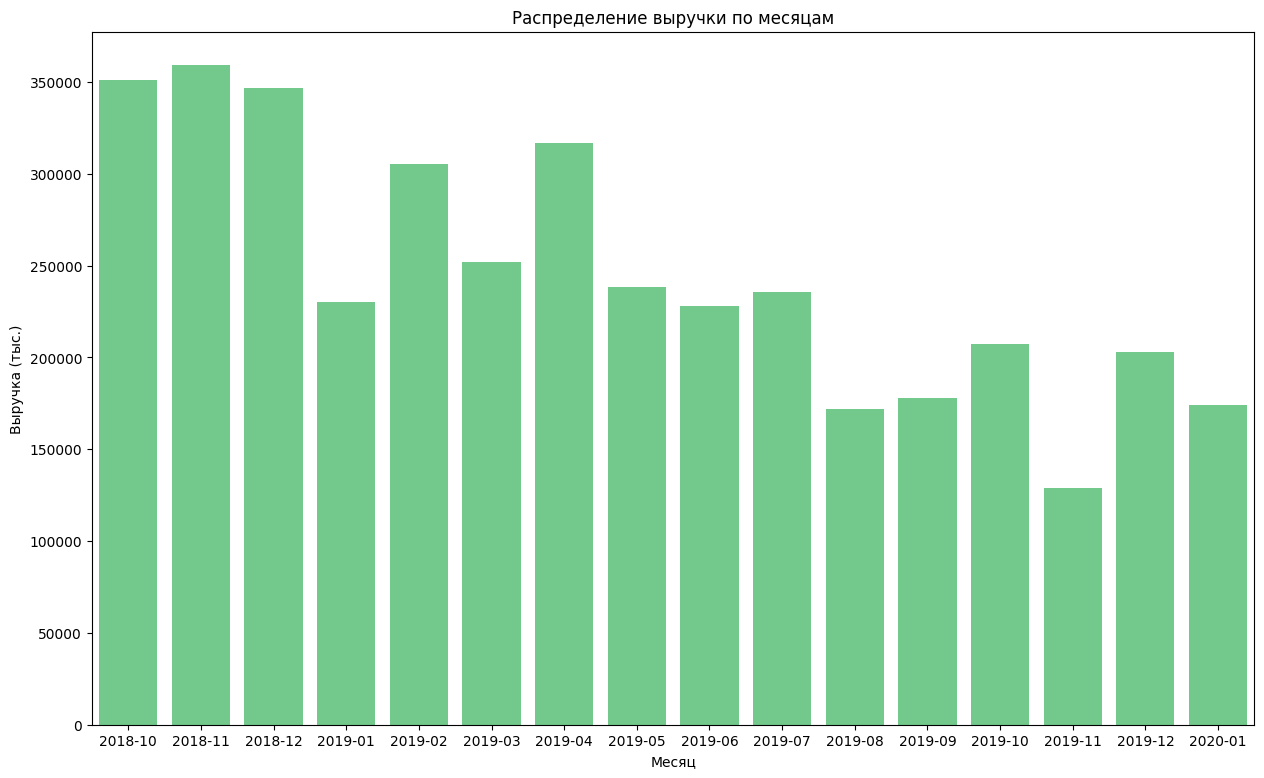

In [ ]:
plt.figure(figsize=(15,9))

sns.barplot (x="month", y="total", data=month_summary, color = '#65D786')

plt.title('Распределение выручки по месяцам')

plt.ylabel('Выручка (тыс.)')

plt.xlabel('Месяц')

plt.show()

**Общий тренд выручки на снижение начиная с апреля. Можно предположить что ещё не настала весна, тогда и выручка вырастет, как после прошлого января. Проверим динамику количества заказов.**

# График распределения количества заказов по месяцам <a id="q-mon"></a>

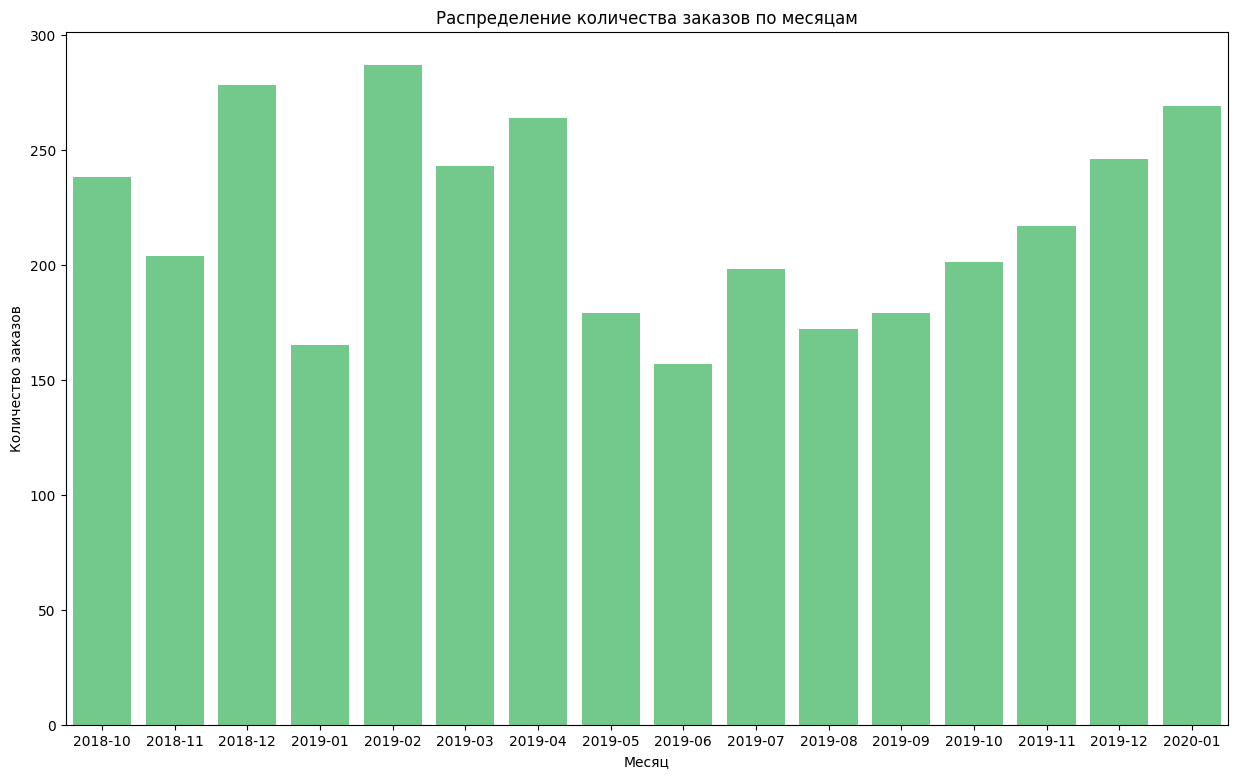

In [ ]:
#расследовать почему ещё

plt.figure(figsize=(15,9))

sns.barplot (x="month", y="order_cnt", data=month_summary, color = '#65D786')

plt.title('Распределение количества заказов по месяцам')

plt.ylabel('Количество заказов')

plt.xlabel('Месяц')

plt.show()

**Количество заказов наоборот имеет положительную динамику. Чтобы понять что происходит проверим динамику среднего чека.**

# График распределения среднего чека по месяцам <a id="mean-mon"></a>

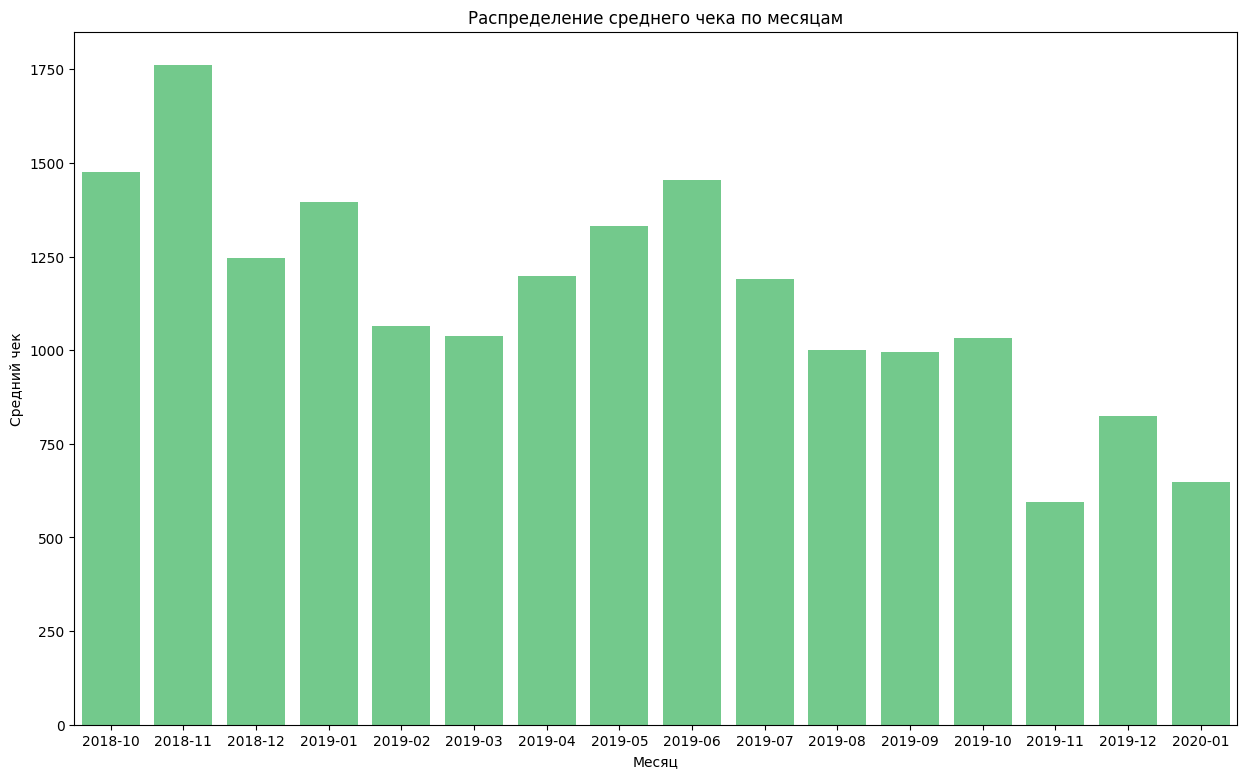

In [ ]:
#расследовать почему ещё

plt.figure(figsize=(15,9))

sns.barplot (x="month", y="mean_invoice", data=month_summary, color = '#65D786')

plt.title('Распределение среднего чека по месяцам')

plt.ylabel('Средний чек')

plt.xlabel('Месяц')

plt.show()

**Средний график показывает что несмотря на то что динамика количества заказов в январе 20-го вернулась к пиковым значениям - покупатели не совершают заказы такой стоимостью чтобы вернуть средний чек на
пиковые значения. На количество выручки повлиял заказ 71743 с рекордной суммой.**

# Графики медианнаго числа заказов и выручки с покупателя <a id="box"></a>

In [ ]:
#строим таблицу для боксплота

median_invoice = shop_df_new.groupby('customer_id').agg({'good_sum':'sum'}).reset_index()

round(median_invoice['good_sum'].median())

838

**Медианное значение выручки с покупателя составляет 838 у.е., необходимо посмотреть разброс этого значения.**

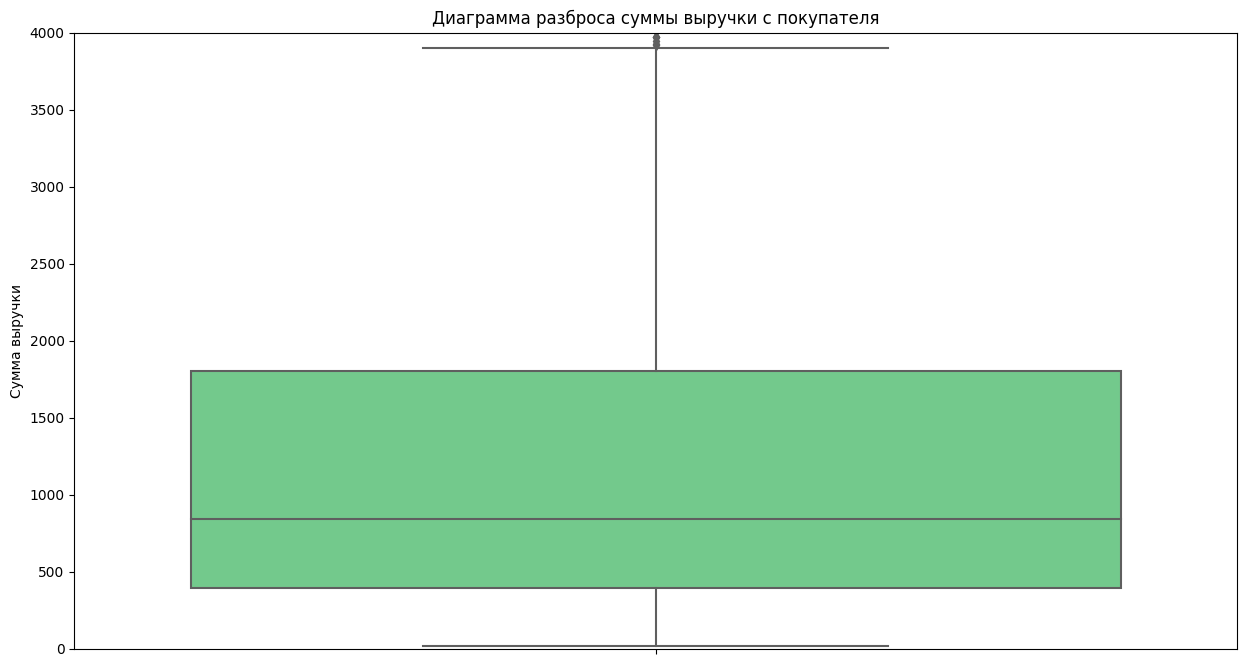

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(data=median_invoice, y="good_sum", color = '#65D786').set(ylim = (0, 4000))

plt.title("Диаграмма разброса суммы выручки с покупателя")

plt.ylabel("Сумма выручки")

plt.show()

**Ящик с "усами" покузывает что больше 50% потратили меньше 1000 у.е. за рассматриваемый нами период. А те кто потратили больше 4000 у.е. считаются выбросами.**

In [ ]:
#среднее и медианное количество заказов на покупателя за период

order_count = shop_df_new.groupby('customer_id').agg({'order_id':'nunique'}).reset_index()

order_count.columns = ['customer_id', 'order_cnt']

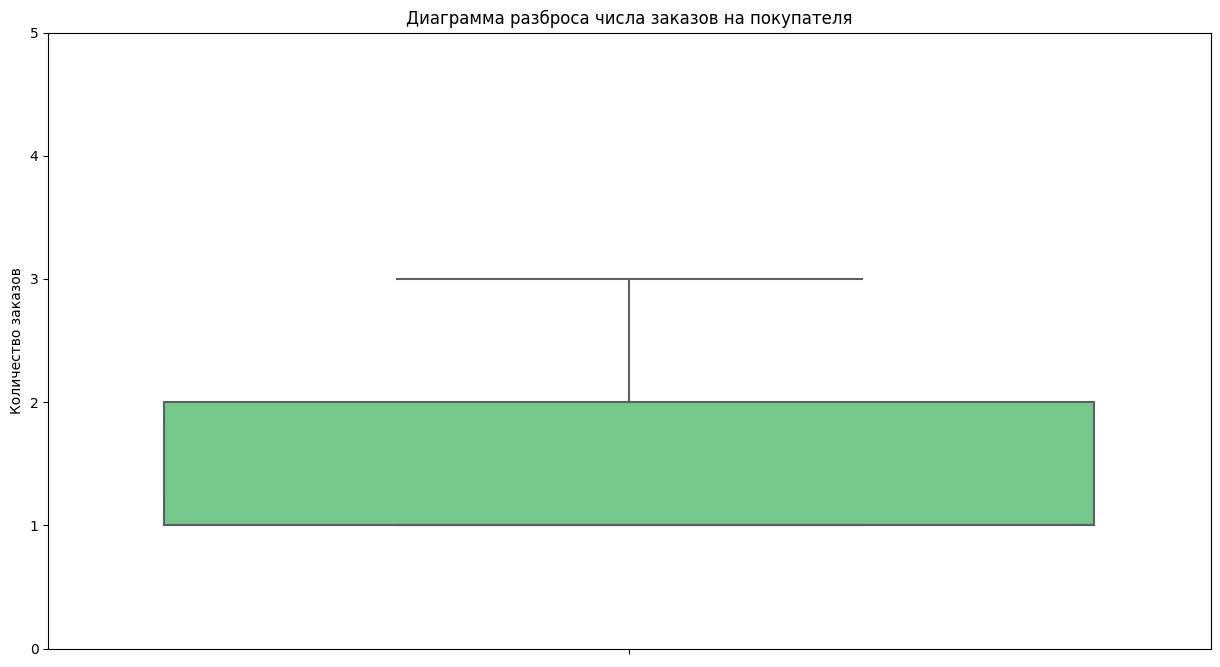

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(data=order_count, y="order_cnt", showfliers=False, color = '#65D786').set(ylim = (0, 5))

plt.title("Диаграмма разброса числа заказов на покупателя")

plt.ylabel("Количество заказов")

plt.show()

**График показывает что покупатели редко совершают более трёх заказов - более трёх считаются выбросами.**

# ИТОГИ ИССЛЕДОВАТЕЛЬСКОГО АНАЛИЗА <a id="fineda"></a>

**1.Продукты в магазине делятся на 6 категорий.**

**2.Больше всего артикулов в категории «Растения», её чаще всего приобретают и она приносит больше всего выручки.  За ней всегда следует категория "Хранение и порядок".**

**3.В ТОП-10 не входят товары категории "Растения".**

**4.Динамика показывает снижение среднего чека магазина – а соответственно – снижение выручки.**

**5.Покупатели в среднем пириобретают на сумму примерно равную 838 рублей и редко совершают более 3 заказов.**

# ЧАСТЬ 4

# СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ И ПРОВЕРКА ГИПОТЕЗ <a id="segment"></a>

**Сегментацию будем провоить методом RFM (Recency, Frequency, Monetary).**

**Для этого созжадим таблицу отражающую общую сумму покупок за период, дату крайней покупки и количества заказов за период**


In [ ]:
clusters = shop_df_new.groupby('customer_id').agg({'date':'max', 'good_sum':'sum', 'order_id':'nunique'}).reset_index()

clusters.insert(3, 'a_date', '2020-01-31')

clusters['a_date'] = dt.datetime(2020, 1, 31)

clusters['Recency'] = clusters['a_date'] - clusters['date']

clusters.columns = ['customer_id', 'last_purchase', 'Monetary', 'a_date', 'Frequency' , 'Recency']

clusters

,customer_id,last_purchase,Monetary,a_date,Frequency,Recency
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,555.0,2020-01-31,1,106 days 16:00:00
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,442.0,2020-01-31,1,348 days 13:00:00
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,914.0,2020-01-31,1,108 days 01:00:00
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,1649.0,2020-01-31,1,368 days 07:00:00
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2324.0,2020-01-31,1,123 days 07:00:00
...,...,...,...,...,...,...
2407,ff601403-b094-4b86-9ac6-264d725b9277,2020-01-19 11:00:00,1739.0,2020-01-31,2,11 days 13:00:00
2408,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-30 07:00:00,397.0,2020-01-31,1,92 days 17:00:00
2409,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-14 23:00:00,389.0,2020-01-31,1,412 days 01:00:00
2410,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,974.0,2020-01-31,1,143 days 12:00:00


**Датафрейм с нужными столбцами создан - можно переходить к рассчётам. Сегменты будут делиться на 4 сегмента по R(как давно покупетль совершил заказ), F (сколько покупок произвёл покупатель за рассматриваемый период), M (какую выручку покупатель принёс за рассматриваемый период).
Сначала расчитаем Recency - период с момента последней покупки до момента настоящего исследования 31-01-2020.**

In [ ]:
clusters['r'] = 5 - (pd.qcut(clusters['Recency'],4,labels=False) + 1)

In [ ]:
clusters['r'].unique()

array([3, 1, 4, 2])

In [ ]:
clusters.groupby('r')['Recency'].agg(['min','max','count'])

,min,max,count
r,,,
1,343 days 06:00:00,487 days 00:00:00,603
2,207 days 13:00:00,343 days 05:00:00,603
3,72 days 07:00:00,207 days 03:00:00,603
4,-1 days +09:00:00,72 days 05:00:00,603


**Для рассчёта Frequency создадим функцию**

In [ ]:

def get_f(x):
  if x == 1:
    return 1
  if x ==  2:
    return 2
  if x in [3,4,5,6]:
    return 3
  return 4

In [ ]:
clusters['f'] = clusters['Frequency'].apply(get_f)

**Рассчитываем Monetary**

In [ ]:
clusters['m'] = pd.qcut(clusters['Monetary'],4,labels=False) + 1

In [ ]:
clusters.groupby('m')['Monetary'].agg(['mean','count'])

,mean,count
m,,
1,209.187673,603
2,605.200663,603
3,1248.180784,608
4,4475.433668,598


**Проверим получившуюся таблицу со столбцами R F и M**

In [ ]:
clusters.head()

,customer_id,last_purchase,Monetary,a_date,Frequency,Recency,r,f,m
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,555.0,2020-01-31,1,106 days 16:00:00,3,1,2
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,442.0,2020-01-31,1,348 days 13:00:00,1,1,2
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,914.0,2020-01-31,1,108 days 01:00:00,3,1,3
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,1649.0,2020-01-31,1,368 days 07:00:00,1,1,3
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2324.0,2020-01-31,1,123 days 07:00:00,3,1,4


**Подсчитаем критерий RFM для каждого пользователя из получившихся столбцов**

In [ ]:
clusters['rfm_score'] = (clusters['r'] + clusters['f'] + clusters['m'])/3

In [ ]:
clusters['rfm_score'] = clusters['rfm_score'].apply(np.floor)

clusters['mean_invoice'] = clusters['Monetary']/clusters['Frequency']

clusters = clusters.sort_values(by='rfm_score', ascending=False)

**Несмотря на то что мы делили критерии на 4 части, ни у одного из покупателей не полуилось набрать 4 балла - поэтому сегмента будем рассматривать 3. Сегмент под номером 3 - лояльные покупатели, 2 - перспективные покупатели, 1 - непостоянные покупатели или покупатели на грани оттока).Проверим процентное соотнешение получившихся сегментов.**

In [ ]:
clusters['rfm_score'].value_counts(normalize=True)

2.0    0.443201
1.0    0.379353
3.0    0.177446
Name: rfm_score, dtype: float64

In [ ]:
customer_count = clusters.groupby('rfm_score').agg({'a_date':'count'}).reset_index()

customer_count

,rfm_score,a_date
0,1.0,915
1,2.0,1069
2,3.0,428


**Ответ на главный запрос бизнеса - кому продавать. ТОП-5 покупателей по оценке RFM.**

In [ ]:
clusters.head()

,customer_id,last_purchase,Monetary,a_date,Frequency,Recency,r,f,m,rfm_score,mean_invoice
1729,b8663a64-f526-4575-baf6-9cc90d88d21e,2020-01-07 10:00:00,1746.0,2020-01-31,2,23 days 14:00:00,4,2,3,3.0,873.000000
1718,b7b865ab-0735-407f-8d0c-31f74d2806cc,2019-04-23 17:00:00,3779.0,2020-01-31,7,282 days 07:00:00,2,4,4,3.0,539.857143
1712,b75888cc-1a96-4314-8194-e4e5c32b01bf,2020-01-04 05:00:00,1506.0,2020-01-31,2,26 days 19:00:00,4,2,3,3.0,753.000000
1706,b6ba5131-b839-451c-b8aa-be517d61f66a,2019-12-23 13:00:00,1124.0,2020-01-31,2,38 days 11:00:00,4,2,3,3.0,562.000000
527,375eeafe-2616-4b2d-ad0c-387ecee9589e,2019-12-03 17:00:00,2908.0,2020-01-31,2,58 days 07:00:00,4,2,4,3.0,1454.000000


# Графики рапределения средних чеков по сегментам <a id="mean-seg"></a>

In [ ]:
# создаём списки для проверки гипотезы

third_cluster = clusters.query('rfm_score == 3')

second_cluster = clusters.query('rfm_score == 2.0')

first_cluster = clusters.query('rfm_score == 1.0')

third_cluster_monetary = third_cluster['Monetary'].tolist()

second_cluster_monetary = second_cluster['Monetary'].tolist()

first_cluster_monetary = first_cluster['Monetary'].tolist()

**Для начала проверим среднее среди средних чеков - у второго сегмента самый высокий показатель среднего чека - проверим является это статистически значимой разницей.**

In [ ]:
#средний чек третьего сегмента

print(third_cluster['mean_invoice'].mean())

#средний чек второго сегмента

print(second_cluster['mean_invoice'].mean())

#средний чек первого сегмента

print(first_cluster['mean_invoice'].mean())

1396.4314540847488
1668.744699095728
498.99234972677596


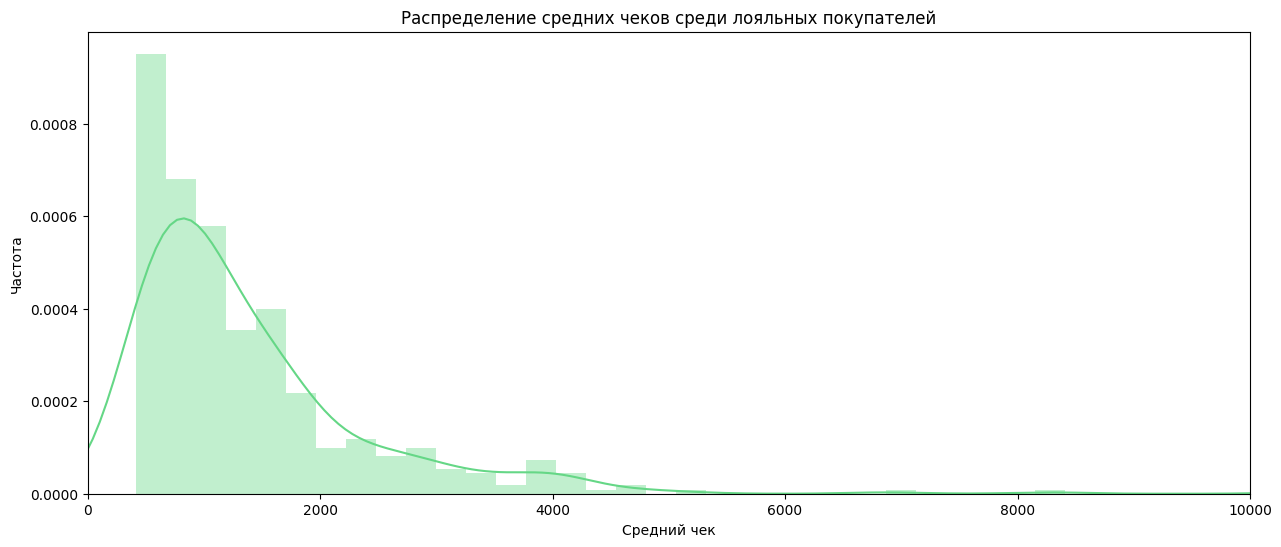

In [ ]:
plt.figure(figsize=(15, 6))

sns.distplot(third_cluster['mean_invoice'], color = '#65D786')

plt.xlim([0, 10000])

plt.title('Распределение средних чеков среди лояльных покупателей')

plt.ylabel('Частота')

plt.xlabel('Средний чек')

plt.show()

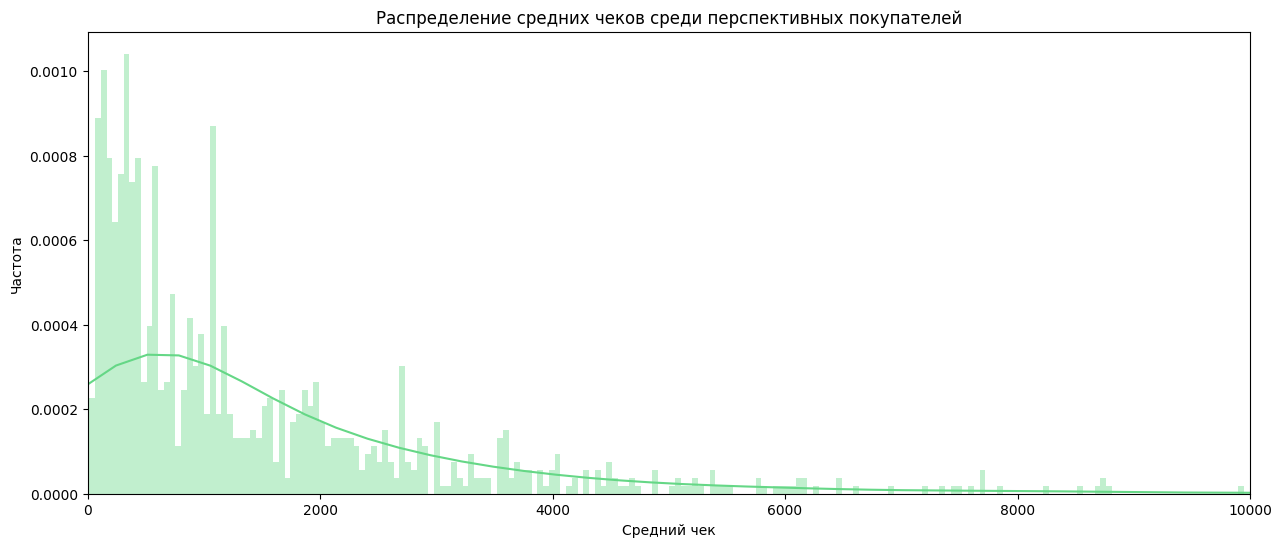

In [ ]:
plt.figure(figsize=(15, 6))

sns.distplot(second_cluster['mean_invoice'], bins = 1000, color = '#65D786')

plt.xlim([0, 10000])

plt.title('Распределение средних чеков среди перспективных покупателей')

plt.ylabel('Частота')

plt.xlabel('Средний чек')

plt.show()

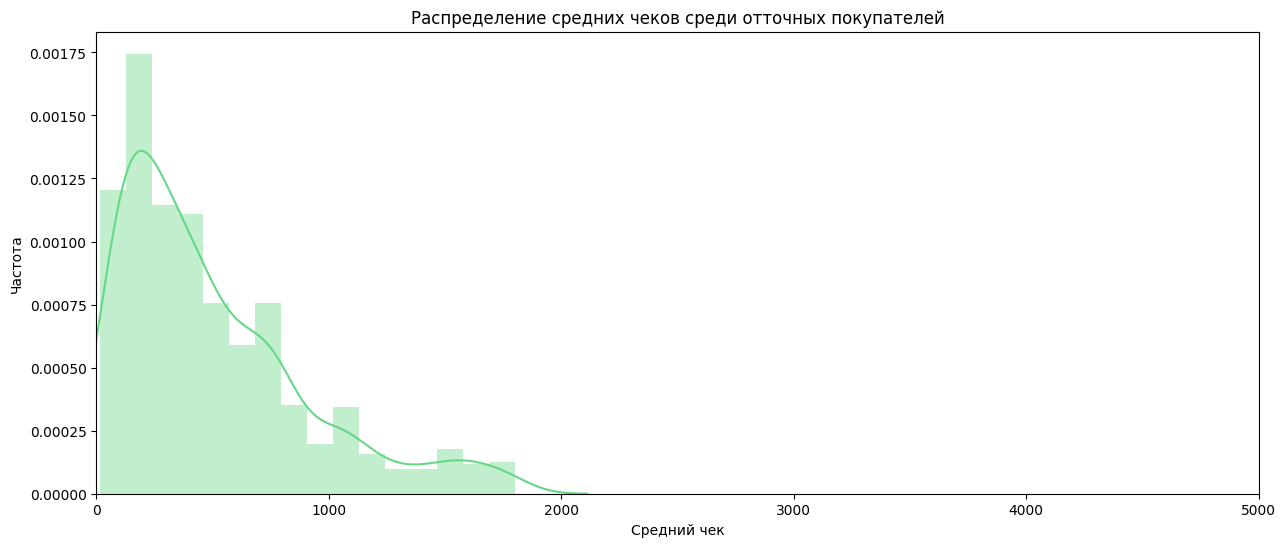

In [ ]:
plt.figure(figsize=(15, 6))

sns.distplot(first_cluster['mean_invoice'], color = '#65D786')

plt.xlim([0, 5000])

plt.title('Распределение средних чеков среди отточных покупателей')

plt.ylabel('Частота')

plt.xlabel('Средний чек')

plt.show()

**Распределния представляют собой распределения Пуассона, скошенное вправо. Средние чеки распределний похожи и имеют пик до 1000 у.е. Отличие графиков второго и третьего сегментов от первого - в том что они имеют более
длинный "хвост" - то есть имеют таких покупателей, которые могут тратить значительно больше остальных. Есть повод проверить гипотезу о равенстве средних чеков между сегментами.**

# Проверка гипотезы о равенстве средних чеков между сегментами
<a id="hyp1"></a>

**Так как имеющиеся выборки небольшого размера, для проверки гипотез воспользуемся непараметрическим аналогом t-testа - тестом Манна-Уитни. Вместе с этим, так как у нас прводится три проверки, мы скорректируем уровень стат.значимости методом Шидака для множественных проверок.**

**Нулевая гипотеза(Н0):Показатели среднего чека сегментов равны;**

**Альтернативная гипотеза(НА):Показатели среднего чека сегментов различаются.**

In [ ]:
cluster_1 = first_cluster_monetary

cluster_2 = second_cluster_monetary

cluster_3 = third_cluster_monetary

alpha = 0.05  # критический уровень статистической значимости

results_1_2 = st.mannwhitneyu(cluster_1, cluster_2)

results_2_3 = st.mannwhitneyu(cluster_2, cluster_3)

results_1_3 = st.mannwhitneyu(cluster_1, cluster_3)

print('p-значение для сравнения сегментов 1 и 2: ', results_1_2.pvalue)

print('p-значение для сравнения сегментов 2 и 3: ', results_2_3.pvalue)

print('p-значение для сравнения сегментов 1 и 3: ', results_1_3.pvalue)

shidak_alpha = 1 - (1 - alpha)**(1/3)

if results_1_2.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу для сравнения сегментов 1 и 2')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сегментов 1 и 2'
    )

if results_2_3.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу для сравнения сегментов 2 и 3')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения сегментов 2 и 3'
    )

if results_1_3.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу для сравнения сегментов 1 и 3')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения сегментов 1 и 3'
    )

p-значение для сравнения сегментов 1 и 2:  3.397694523032607e-115
p-значение для сравнения сегментов 2 и 3:  2.863172113873912e-46
p-значение для сравнения сегментов 1 и 3:  1.1442306268983832e-169
Отвергаем нулевую гипотезу для сравнения сегментов 1 и 2
Отвергаем нулевую гипотезу для сравнения сегментов 2 и 3
Отвергаем нулевую гипотезу для сравнения сегментов 1 и 3


**Ни для одного из трёх сравнений не подтвердилась гипотеза о равенстве средних чеков - стат.тест отвергает нулевую гипотезу о равенстве средних чеков в пользу альтернативной - о неравенстве.**

# Графики динамики количества заказов среди сегментов <a id="quan-seg"></a>

**Для построения графиков - добавим поле с сегментом покупателя к основному графику**

In [ ]:
cluster_list = clusters[['customer_id','rfm_score']]

joined_shop=shop_df_new.merge(cluster_list, on='customer_id')

joined_shop.head()

,date,customer_id,order_id,product,quantity,price,good_sum,goods_category,month,rfm_score
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,Растения,2018-10,1.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,Растения,2018-10,1.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,Растения,2018-10,1.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус лутесценс d-9 см,1,179.0,179.0,Растения,2018-10,1.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус зумула d-12 см h-25 см,1,112.0,112.0,Растения,2018-10,1.0


In [ ]:
#среднее количество заказов третьего сегмента

print(third_cluster['Frequency'].mean())

#среднее количество заказов второго сегмента

print(second_cluster['Frequency'].mean())

#среднее количество заказов первого сегмента

print(first_cluster['Frequency'].mean())

2.439252336448598
1.411599625818522
1.025136612021858


In [ ]:
rfm_scores = [1.0, 2.0, 3.0]

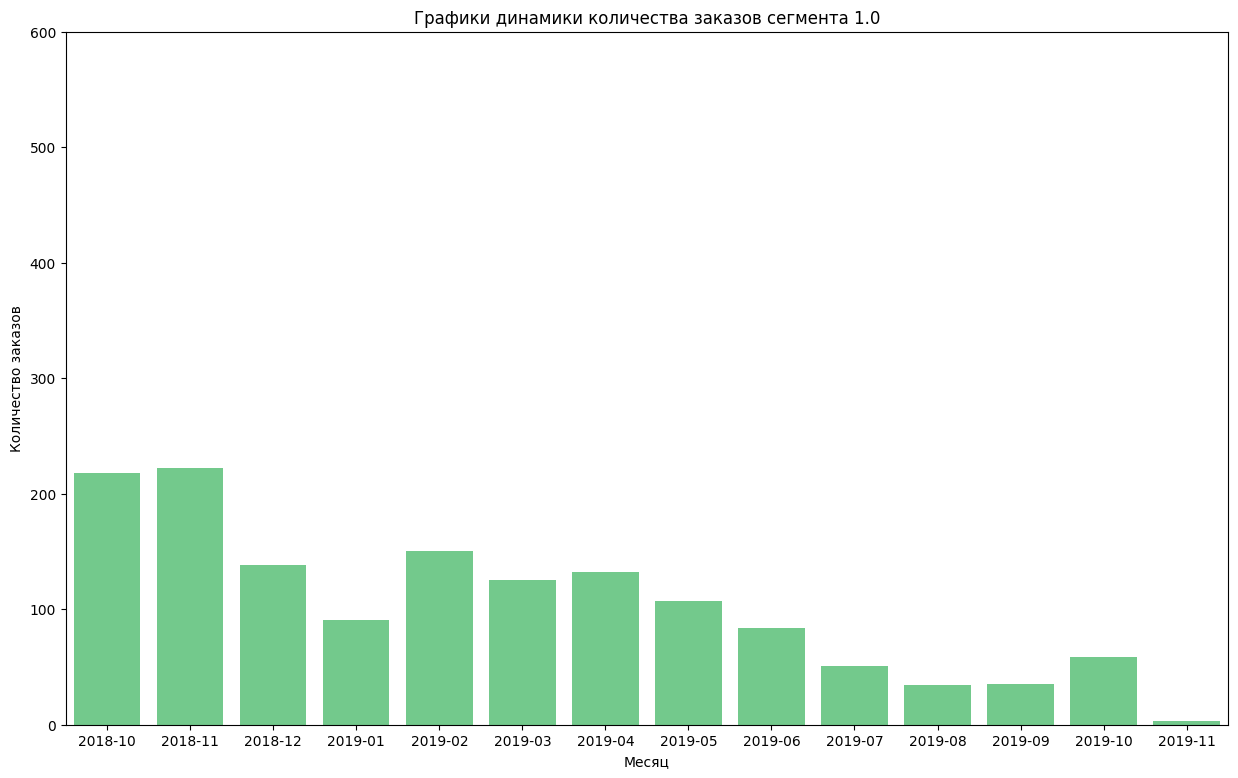

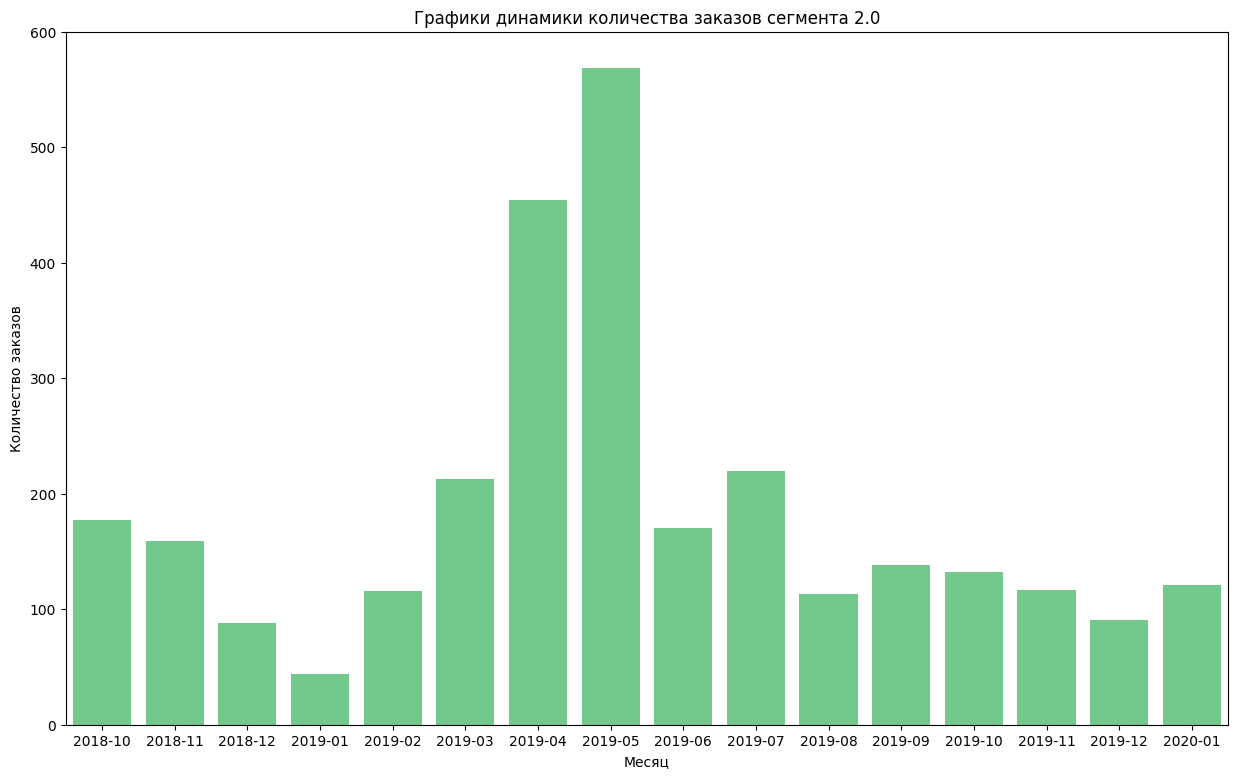

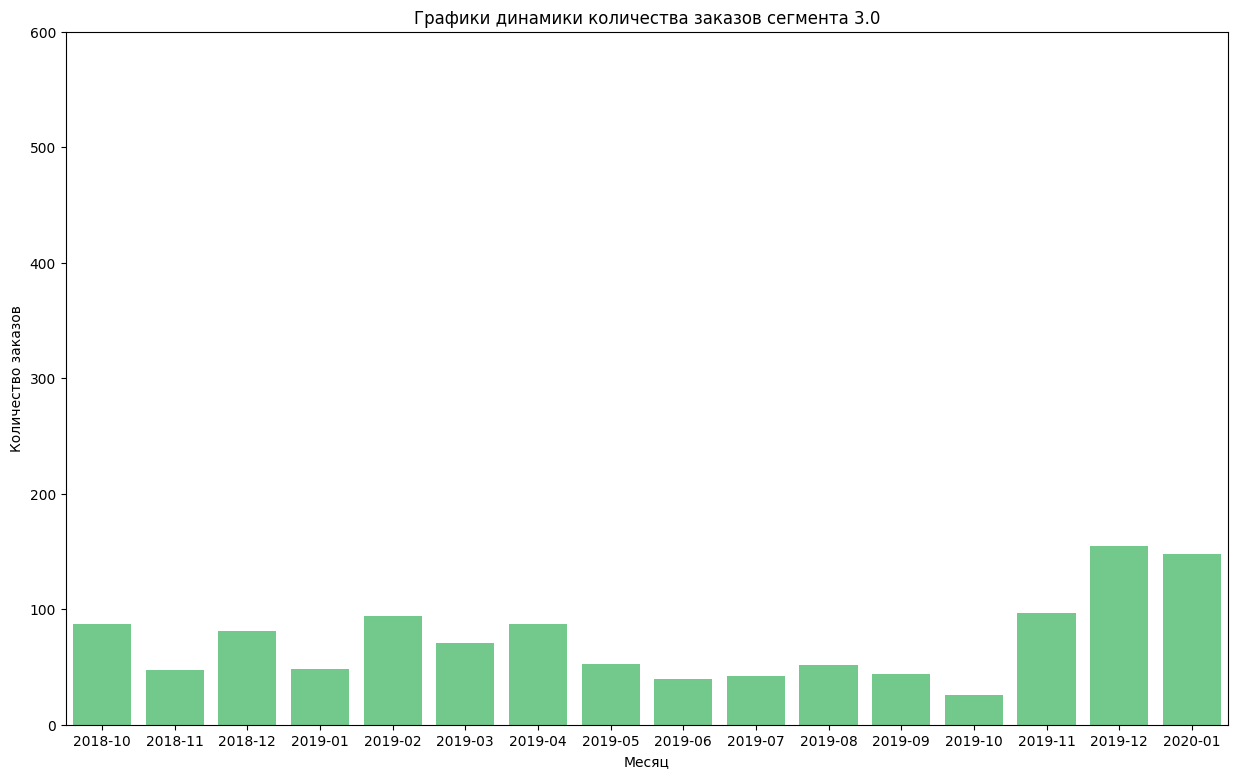

In [ ]:
#строим графики

for score in rfm_scores :
        score_sale  = (
        joined_shop.query('rfm_score == @score').pivot_table(index=['month'],\
        values='quantity', aggfunc='count')
        .reset_index()
        )

        plt.figure(figsize=(15,9))

        sns.barplot (x="month", y="quantity", data=score_sale, color = '#65D786');

        plt.ylim([0,600])

        plt.title(f'Графики динамики количества заказов сегмента {score}')

        plt.ylabel('Количество заказов')

        plt.xlabel('Месяц')

        plt.show()

**Среди сегментов выделяется сегмент 2 - который имеет на всём промежутке количество заказов выше чем у двух других и имеет большой пик в период апрель-май (вероятно приобретают рассаду на дачу). У первого сегмента отрицательная динамика - значит отточные покупатели не сильно мотивированы. Третий сегмент имеет положительную динамику. Это повод проверить гипотезы на равенство количества заказов между сегментами.**

# Проверка гипотезы о равенстве количества заказов между сегментами
<a id="hyp2"></a>

**Нулевая гипотеза(Н0):Показатели среднего количества заказов равны;**

**Альтернативная гипотеза(НА):Показатели среднего количества заказов не равны.**

In [ ]:
#создаём списки для проверки гипотез

third_cluster_frequency = third_cluster['Frequency'].tolist()

second_cluster_frequency = second_cluster['Frequency'].tolist()

first_cluster_frequency= first_cluster['Frequency'].tolist()

In [ ]:
cluster_1 = first_cluster_frequency

cluster_2 = second_cluster_frequency

cluster_3 = third_cluster_frequency

alpha = 0.05  # критический уровень статистической значимости

results_1_2 = st.mannwhitneyu(cluster_1, cluster_2)

results_2_3 = st.mannwhitneyu(cluster_2, cluster_3)

results_1_3 = st.mannwhitneyu(cluster_1, cluster_3)

print('p-значение для сравнения сегментов 1 и 2: ', results_1_2.pvalue)

print('p-значение для сравнения сегментов 2 и 3: ', results_2_3.pvalue)

print('p-значение для сравнения сегментов 1 и 3: ', results_1_3.pvalue)

shidak_alpha = 1 - (1 - alpha)**(1/3)

if results_1_2.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу для сравнения сегментов 1 и 2')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сегментов 1 и 2'
    )

if results_2_3.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу для сравнения сегментов 2 и 3')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения сегментов 2 и 3'
    )

if results_1_3.pvalue < shidak_alpha:
    print('Отвергаем нулевую гипотезу для сравнения сегментов 1 и 3')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу для сравнения сегментов 1 и 3'
    )

p-значение для сравнения сегментов 1 и 2:  5.322592233726136e-87
p-значение для сравнения сегментов 2 и 3:  8.555815600839679e-96
p-значение для сравнения сегментов 1 и 3:  4.275918737187193e-268
Отвергаем нулевую гипотезу для сравнения сегментов 1 и 2
Отвергаем нулевую гипотезу для сравнения сегментов 2 и 3
Отвергаем нулевую гипотезу для сравнения сегментов 1 и 3


**Ни для одного из трёх сравнений не подтвердилась гипотеза о равенстве средних чеков - стат.тест отвергает нулевую гипотезу о равенстве количества заказов в пользу альтернативной - о неравенстве.**

# Графики динамики среднего чека сегментов  по месяцам <a id="dyn-seg"></a>

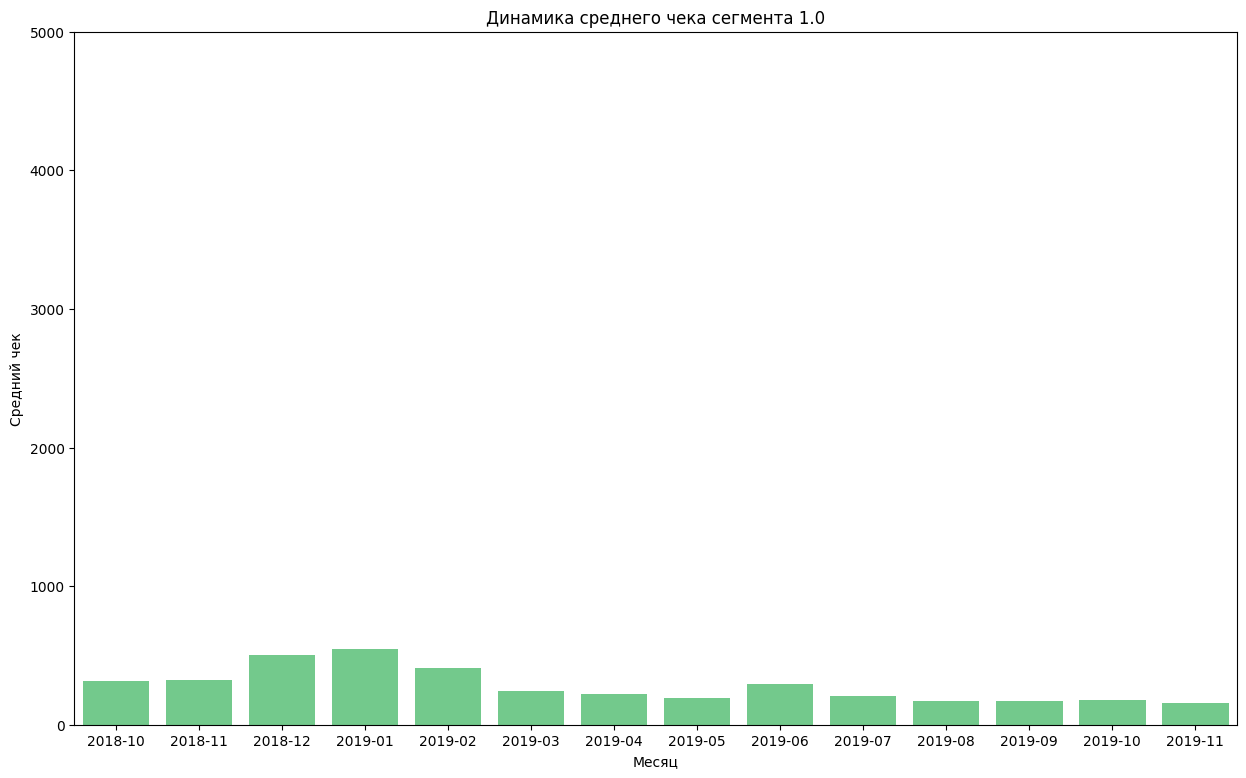

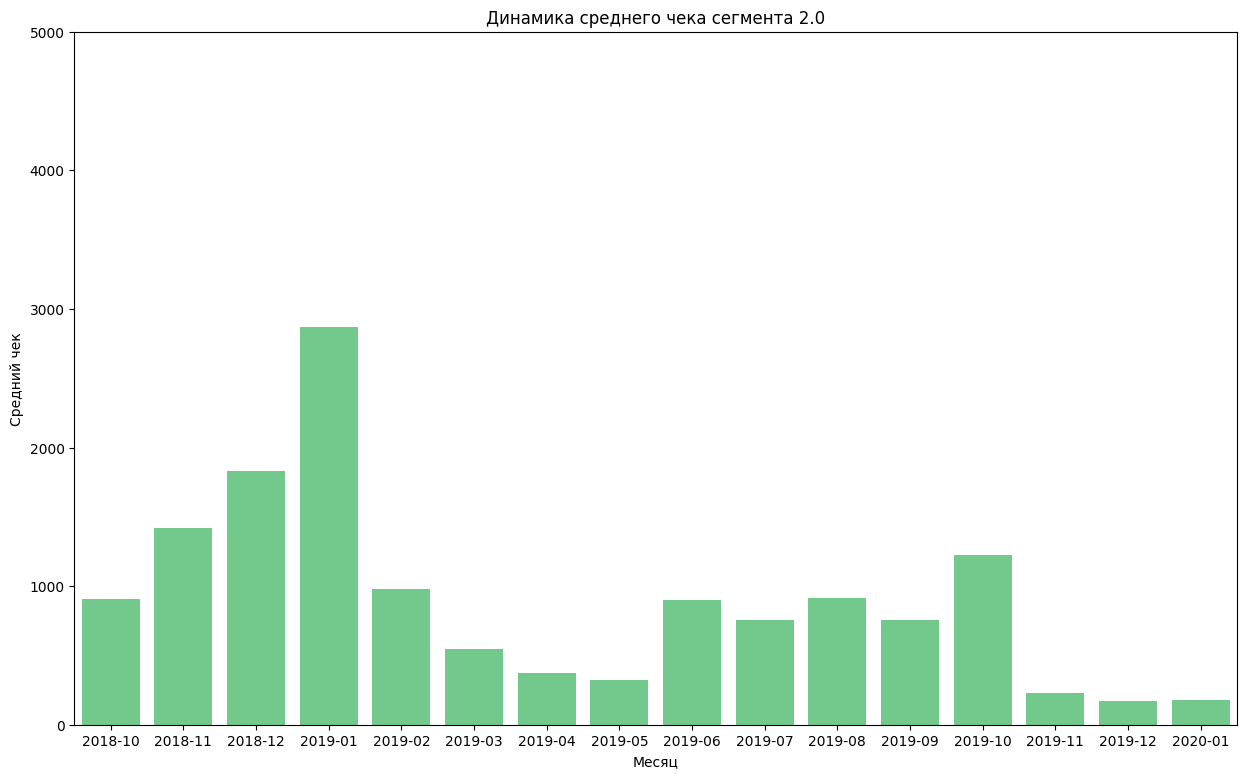

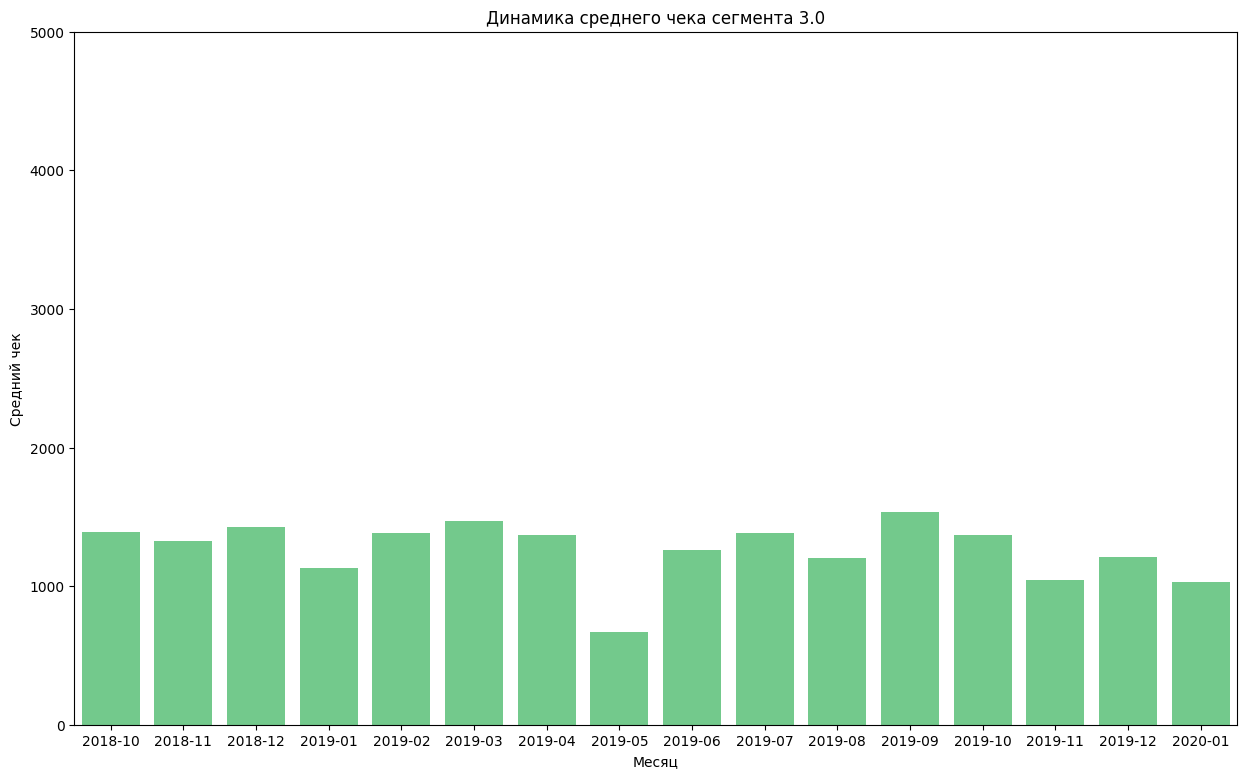

In [ ]:
for score in rfm_scores :
        score_sale  = (
        joined_shop.query('rfm_score == @score').pivot_table(index=['month'],\
        values='good_sum', aggfunc='mean')
        .reset_index()
        )

        plt.figure(figsize=(15,9))

        sns.barplot (x="month", y="good_sum", data=score_sale, color = '#65D786');

        plt.ylim([0,5000])

        plt.title(f'Динамика среднего чека сегмента {score}')

        plt.ylabel('Средний чек')

        plt.xlabel('Месяц')

        plt.show()

**По графикам можно увидеть стабильный средний чек в 1500 у.е. у 3го сегмента - стабильная выручка без перепадов тоже имеет свои плюсы. Первый сегмент имеет стабильность в районе 500 у.е. Сегмент 2 подвержен сезонным покупкам (декабрь-январь новогодние праздники) - это осноной сегмент покупателей магазина. Июньский всплеск среднего чека обусловлен аномальным заказом 71743.**

# Графики предпочений по категориям товаров по сегментам <a id="cat-seg"></a>

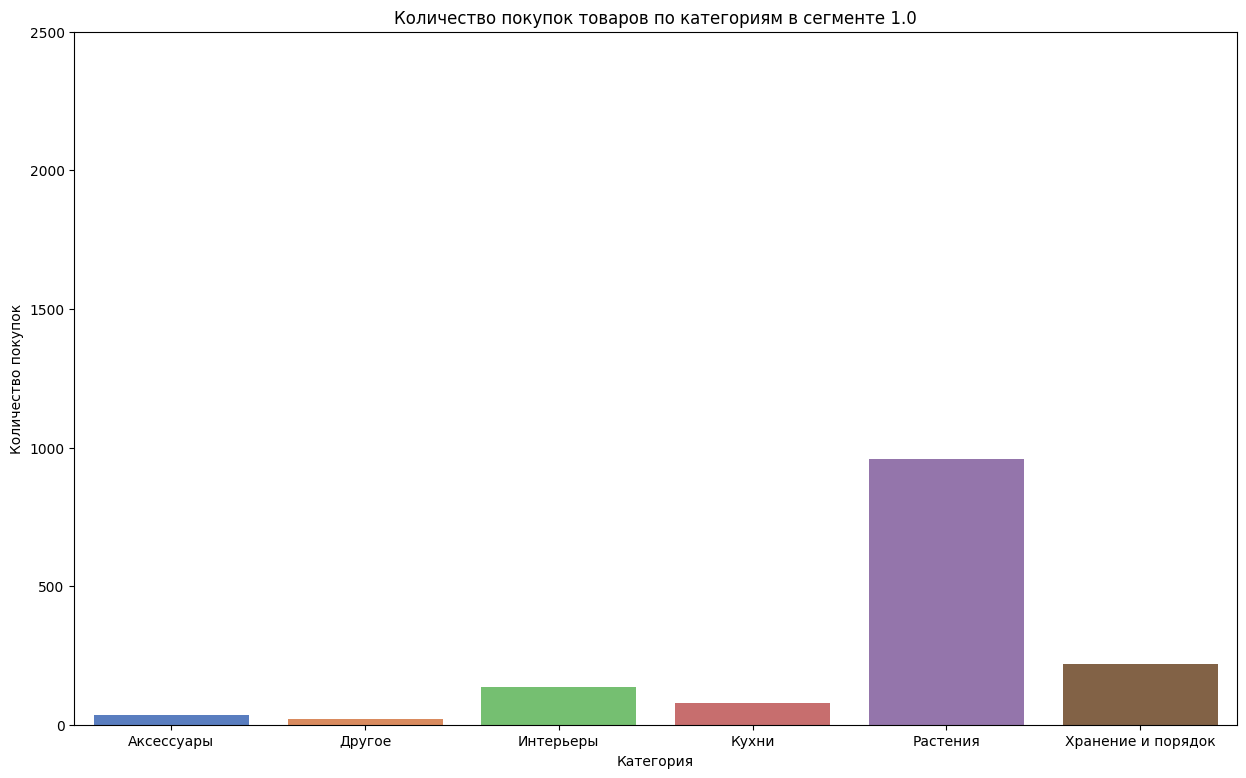

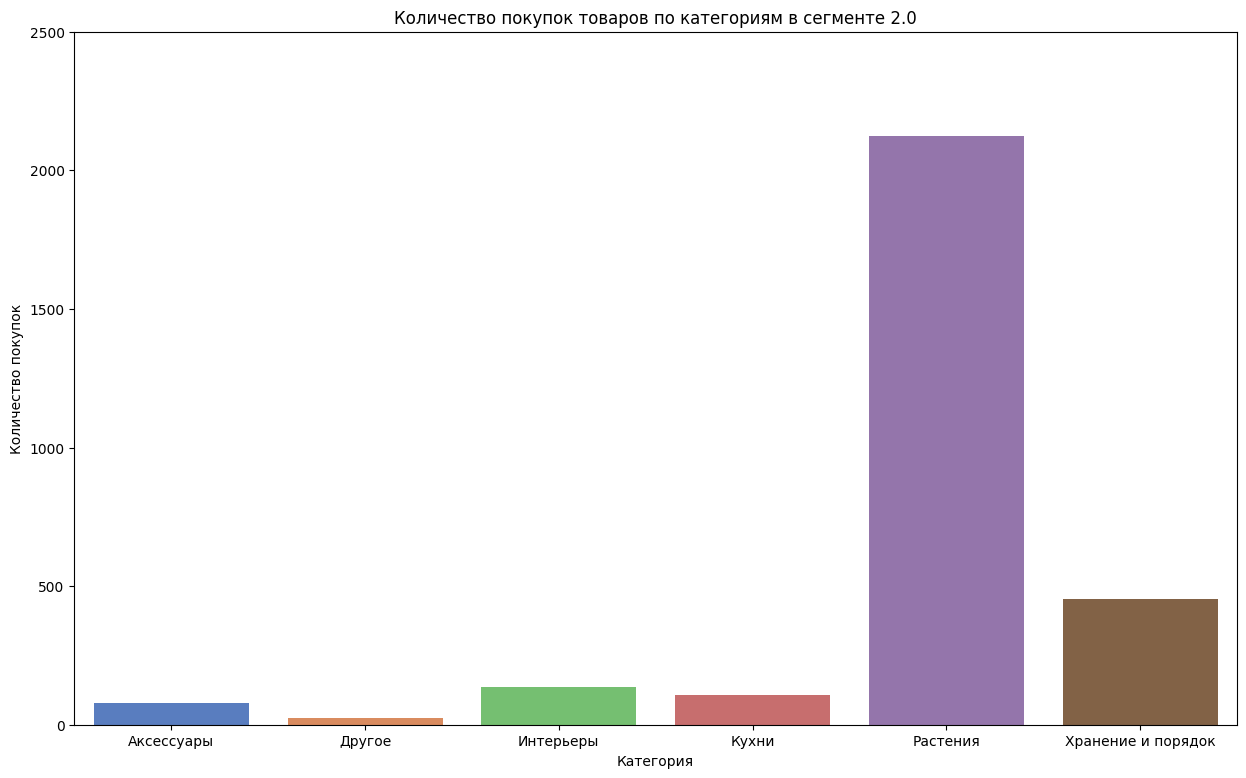

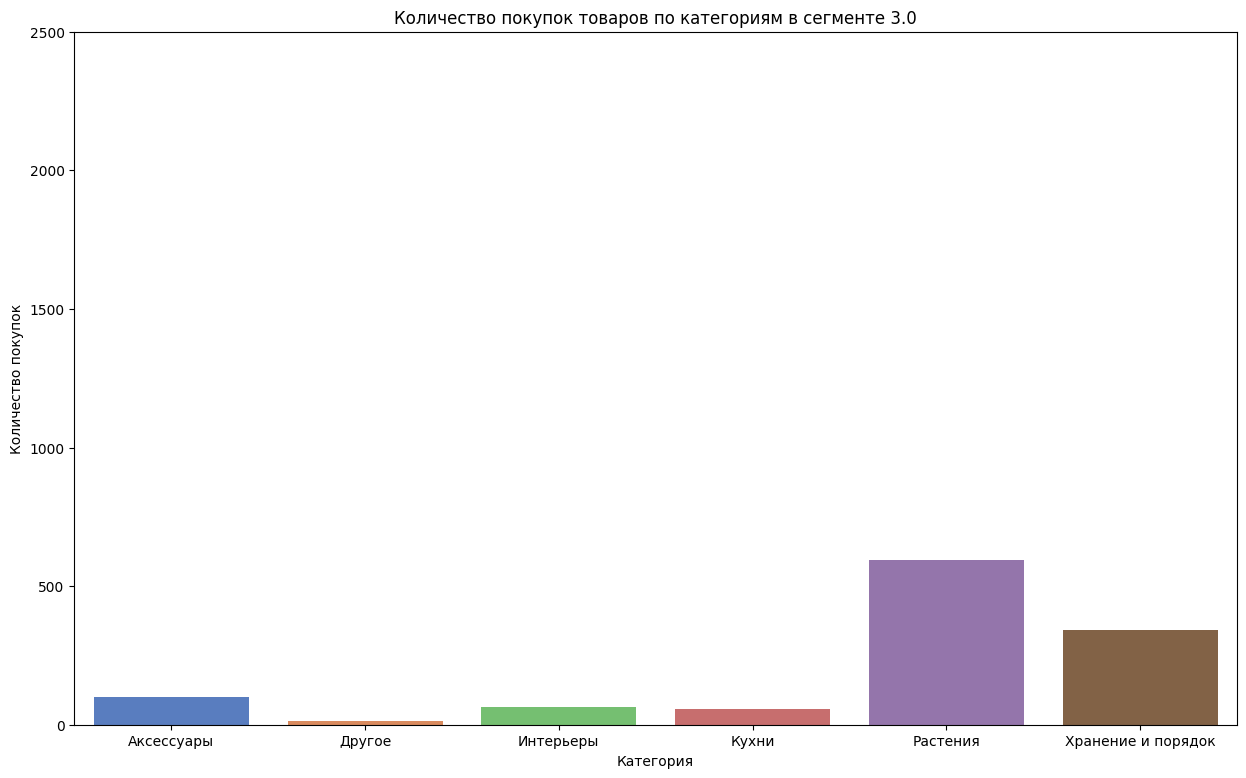

In [ ]:
#строим графики

for score in rfm_scores :
        score_sale  = (
        joined_shop.query('rfm_score == @score').pivot_table(index=['goods_category'],\
        values='quantity', aggfunc='count')
        .reset_index()
        )

        plt.figure(figsize=(15,9))

        sns.barplot (x="goods_category", y="quantity", data=score_sale);

        plt.ylim([0,2500])

        plt.title(f'Количество покупок товаров по категориям в сегменте {score}')

        plt.ylabel('Количество покупок')

        plt.xlabel('Категория')

        plt.show()

**Графики по категориям показывают практически одинаковые показатели по сегментам - только у второго сегмента предпочтение к растениям более ярко выражено чем у двух остальных. Проверим предпочтения сегментов по товарам.**

# Графики ТОП-10 товаров в разбивке по сегментам <a id="top-seg"></a>

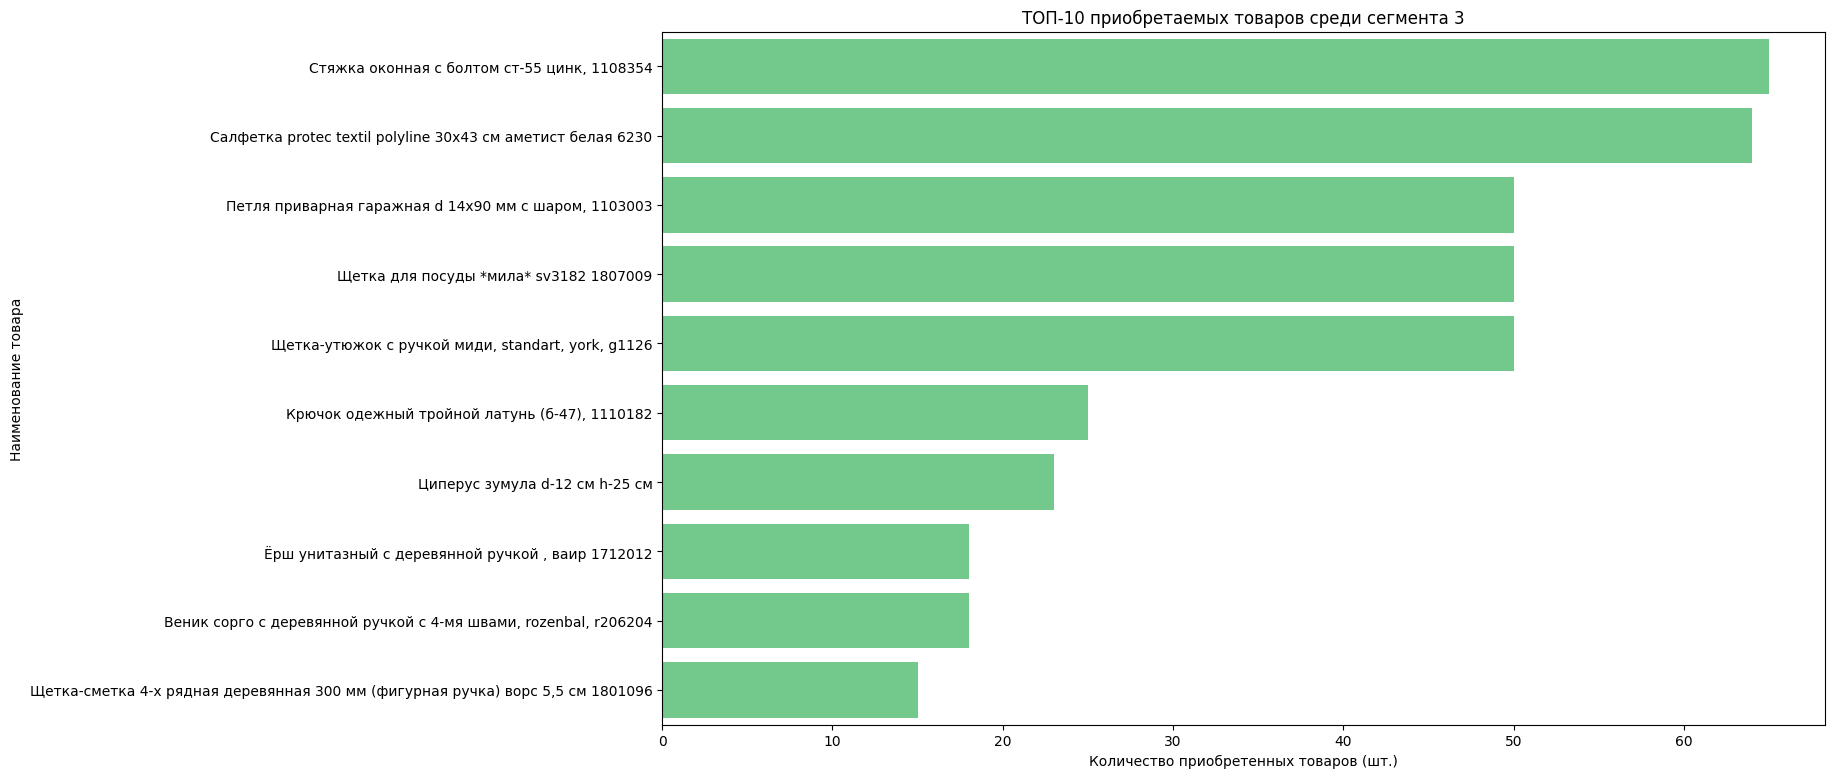

In [ ]:
third_group = joined_shop.query('rfm_score == 3.0')

third_group = third_group.groupby('product').agg({'quantity':'sum'}).reset_index()

third_group = third_group.sort_values(by='quantity',ascending=False).head(10)

plt.figure(figsize=(15,9))

sns.barplot(x="quantity", y="product", data=third_group, color = '#65D786')

plt.title(f'ТОП-10 приобретаемых товаров среди сегмента 3')

plt.ylabel('Наименование товара')

plt.xlabel('Количество приобретенных товаров (шт.)')

plt.show()

**Среди "лояльного" сегмента популярны хозяйственные товары.**

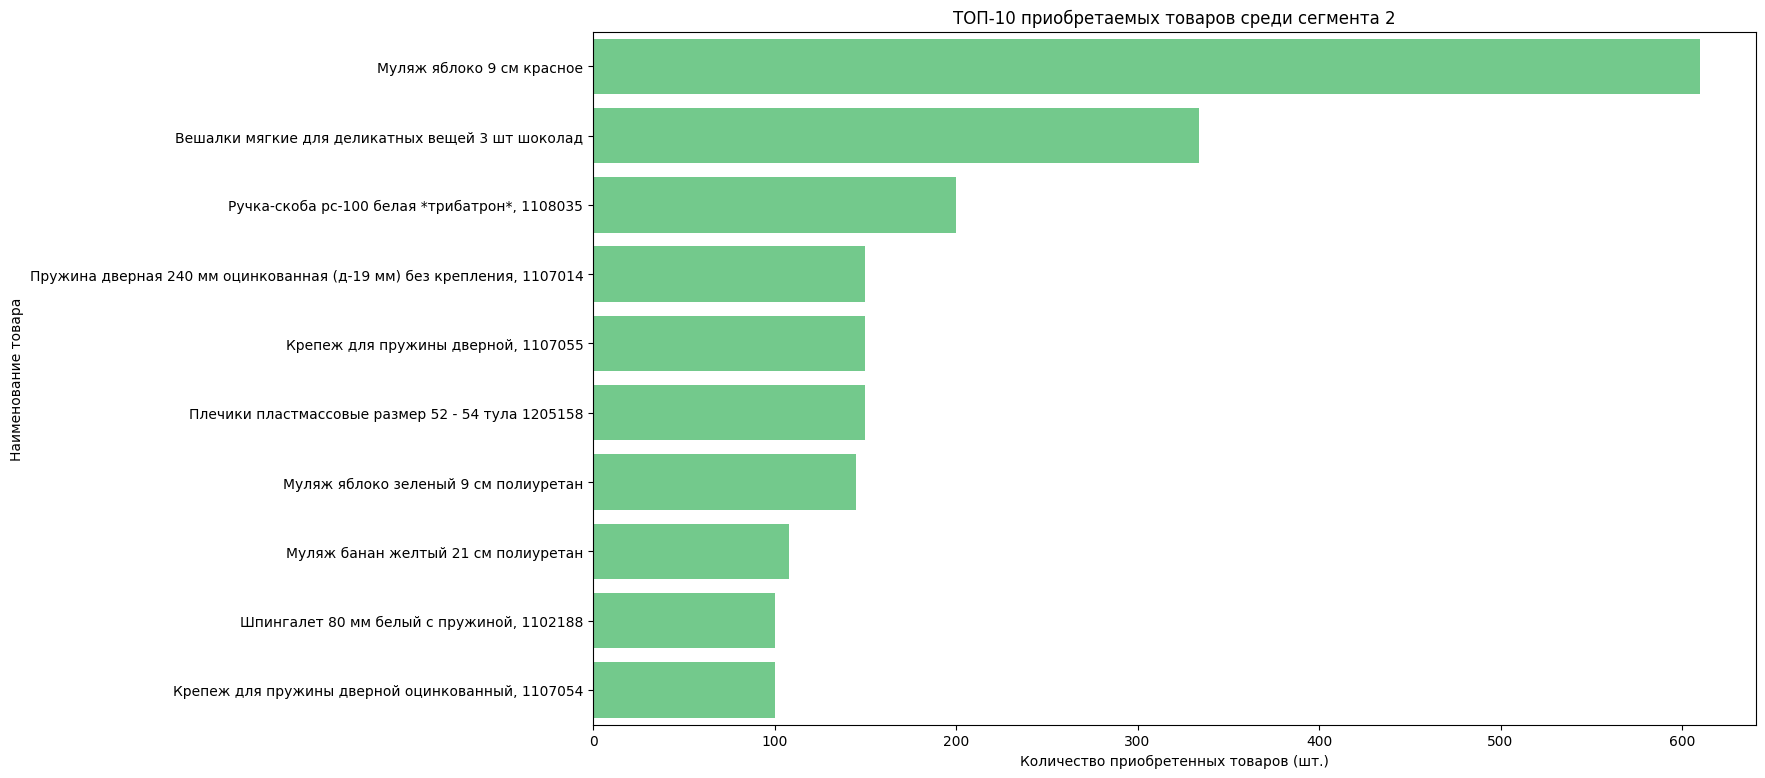

In [ ]:
second_group = joined_shop.query('rfm_score == 2.0')

second_group = second_group.groupby('product').agg({'quantity':'sum'}).reset_index()

second_group = second_group.sort_values(by='quantity',ascending=False)

second_group = second_group.head(10)

plt.figure(figsize=(15,9))

sns.barplot(x="quantity", y="product", data=second_group, color = '#65D786')

plt.title(f'ТОП-10 приобретаемых товаров среди сегмента 2')

plt.ylabel('Наименование товара')

plt.xlabel('Количество приобретенных товаров (шт.)')

plt.show()

**График 2-го сегмента похож на общий график популярных товаров и это не удивительно -так как это 44% от всех покупателей. Среди сегмента популярны муляжи и крепежи.**

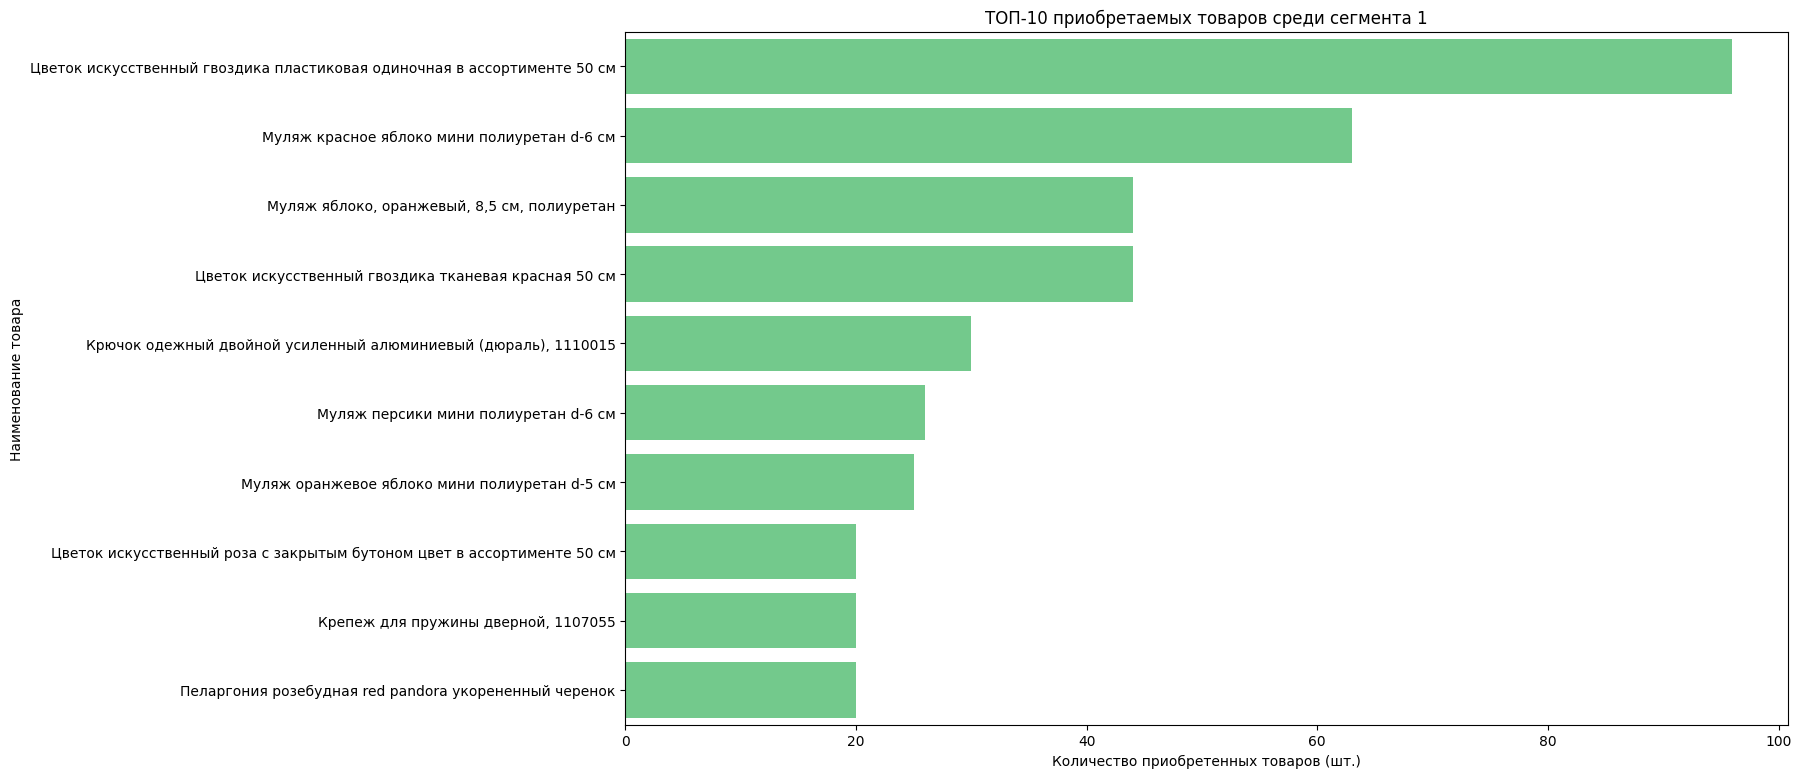

In [ ]:
first_group = joined_shop.query('rfm_score == 1.0')

first_group = first_group.groupby('product').agg({'quantity':'sum'}).reset_index()

first_group = first_group.sort_values(by='quantity',ascending=False).head(10)

plt.figure(figsize=(15,9))

sns.barplot(x="quantity", y="product", data=first_group, color = '#65D786')

plt.title(f'ТОП-10 приобретаемых товаров среди сегмента 1')

plt.ylabel('Наименование товара')

plt.xlabel('Количество приобретенных товаров (шт.)')

plt.show()

**У первого сегмента также популярны муляжи, но отличающиеся от товаров для второго семента. Здесь лидер уже не яблоко, а искуственная гвоздика. Для каждого из сегментов интересны различные конкретные товары - это очень полезная информация для введения перснонализированных предложений и таргетированой рекламы.**

# График распределения среднего числа товарных единиц в заказе по сегментам <a id="tov-ed"></a>

**Проверим сколько в среднем покупатели сегментов добавляют позиций в заказ**

In [ ]:
#таблица для построения графиков

order_table = joined_shop.groupby(['order_id', 'rfm_score']).agg({'quantity':'sum'}).reset_index()

order_table.sort_values(by = 'quantity', ascending=False)

,order_id,rfm_score,quantity
1984,71668,2.0,334
1893,71478,2.0,300
404,68611,2.0,300
797,69289,2.0,200
532,68815,2.0,170
...,...,...,...
1818,71299,1.0,1
1819,71300,2.0,1
1820,71301,2.0,1
1821,71302,2.0,1


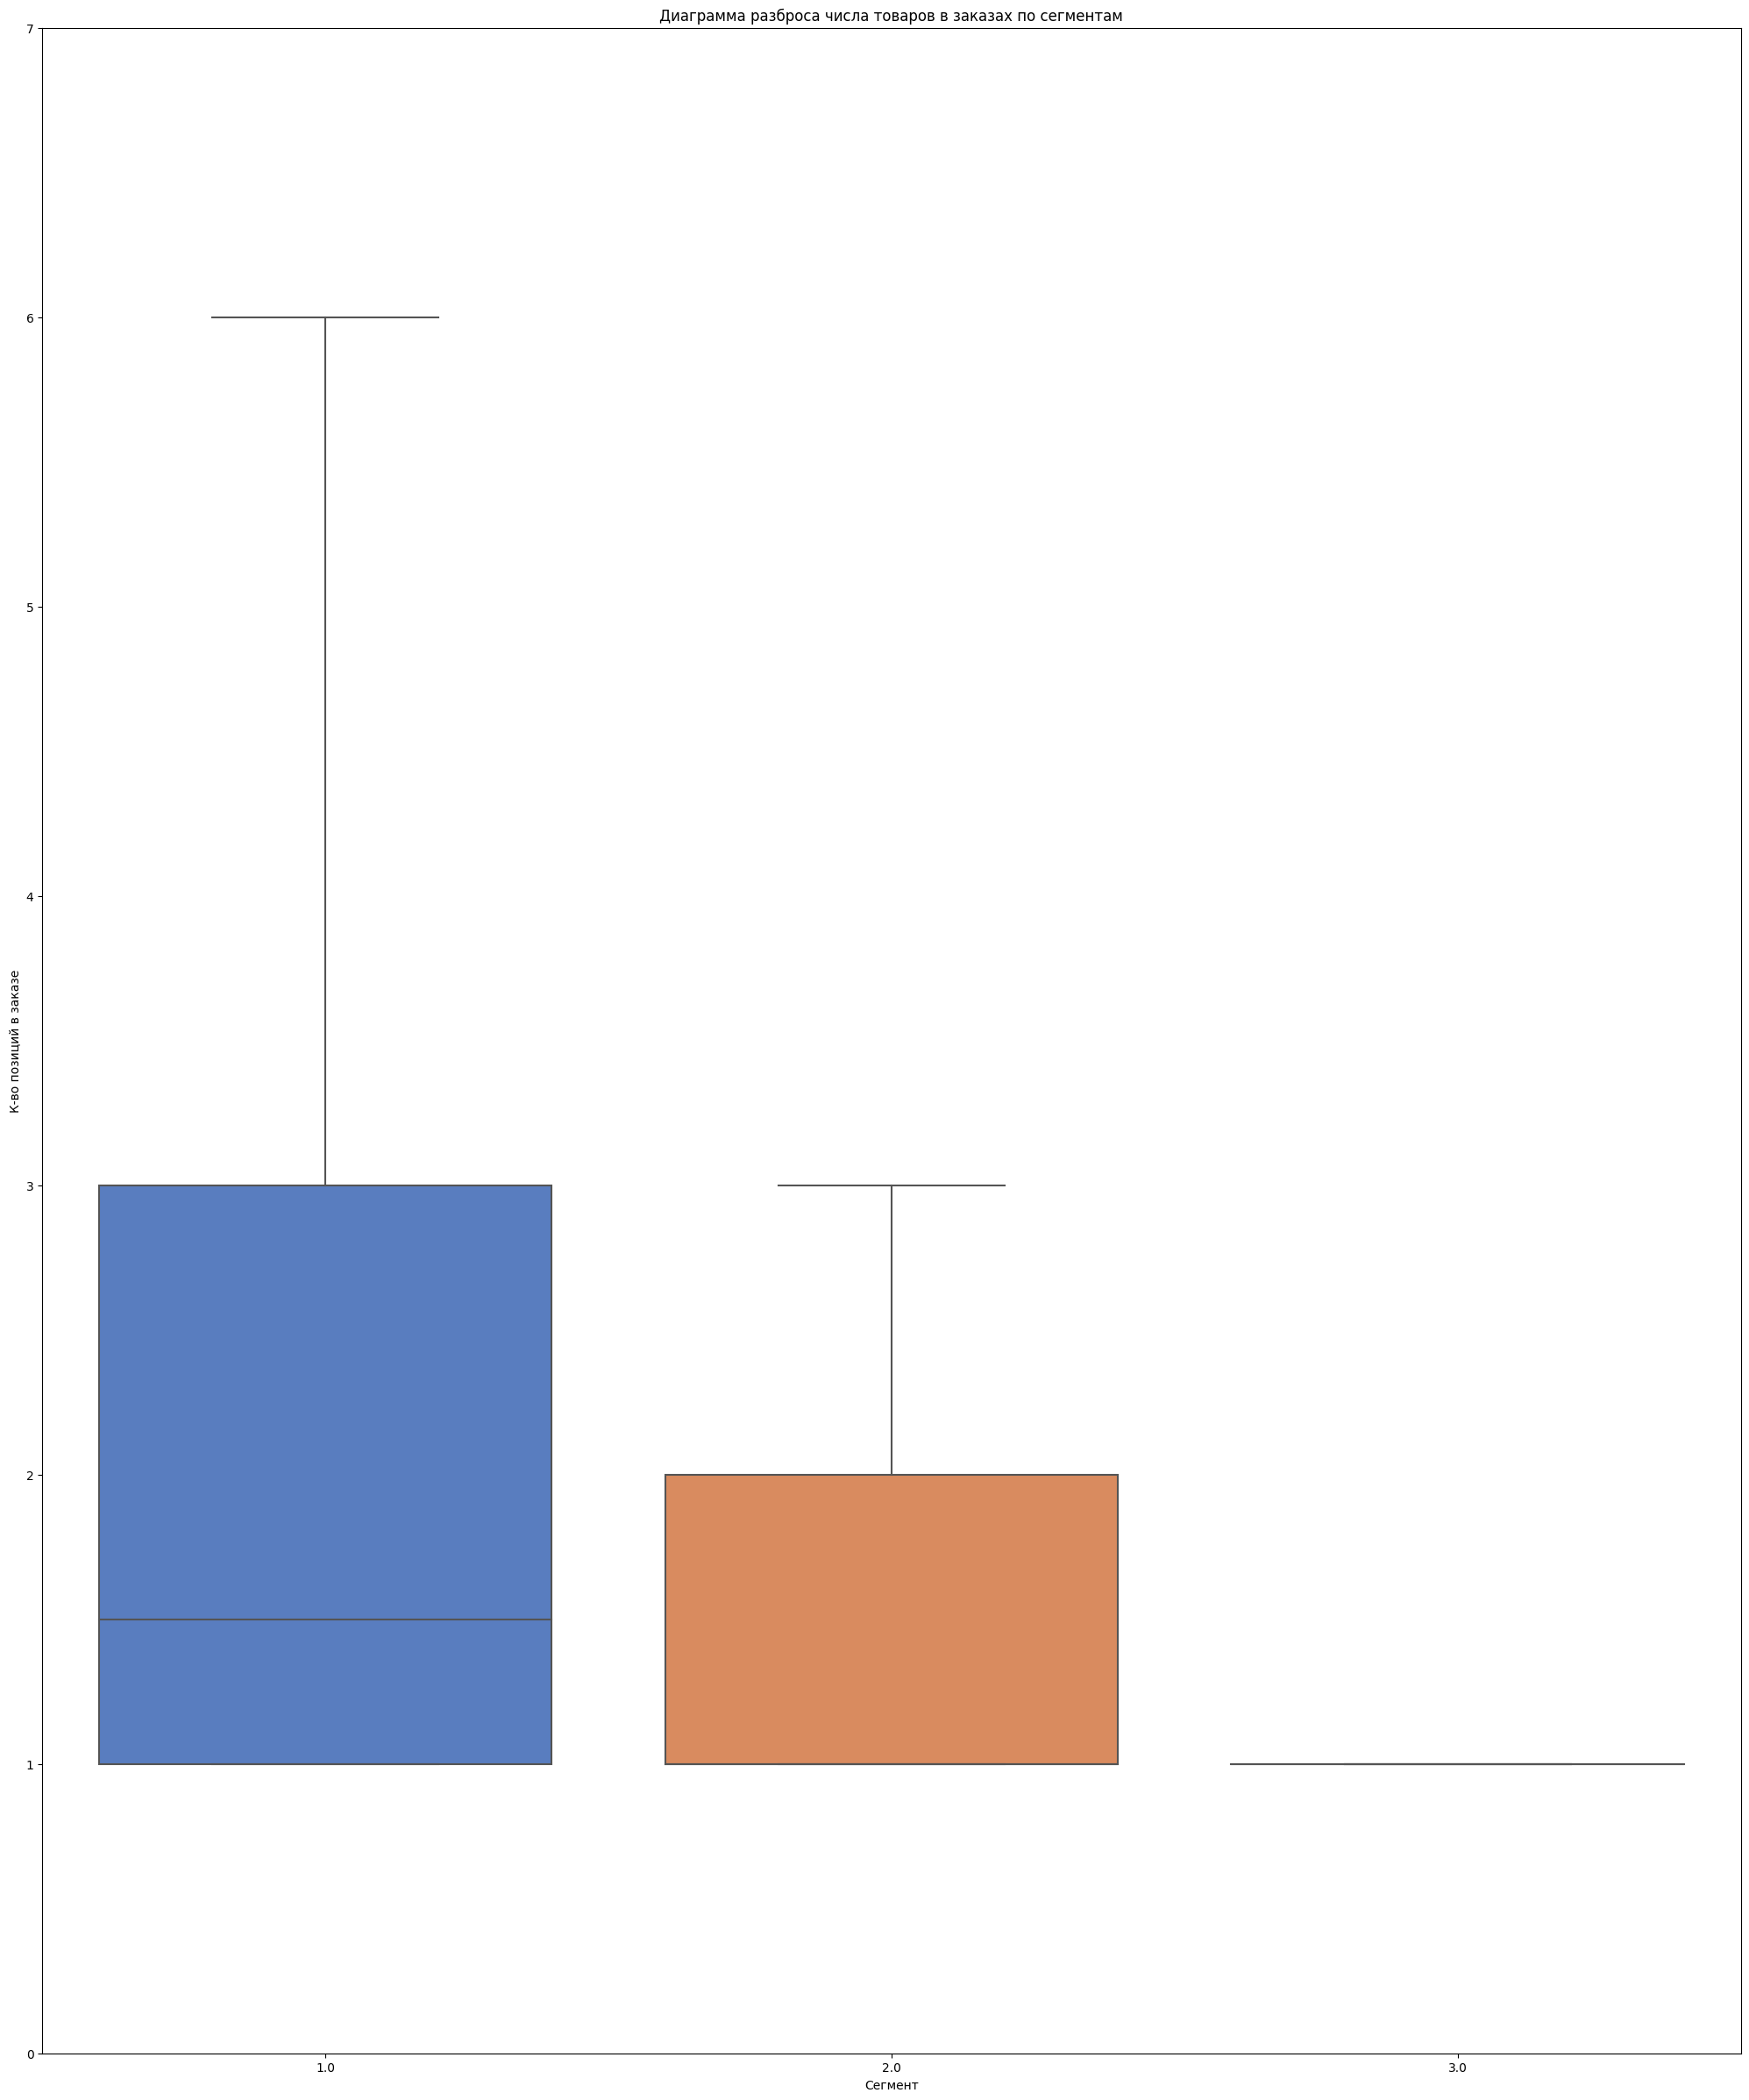

In [ ]:
plt.figure(figsize=(25,30))

sns.boxplot(data=order_table, y="quantity", x="rfm_score", showfliers=False).set(ylim = (0, 7))

plt.title("Диаграмма разброса числа товаров в заказах по сегментам")

plt.xlabel("Сегмент")

plt.ylabel("К-во позиций в заказе")

plt.show()

**Несмотря на аномальные заказы по 300 позиций в заказе- график показывает что для во всех трёх сегментах в заказах более чем в 50% случаях заказ не более 1 позиции, при этом выбросами для 1го сегмета являются заказы с большим чем 6 позиций, для 2го - большим чем 3 позиции, а покупатели третьего сегмента предпочитают приобретать штучно.**

# ИТОГИ ИЗУЧЕНИЯ СЕГМЕНТОВ ПОКУПАТЕЛЕЙ <a id="finseg"></a>

**1.Покупатели делятся на 3 сегмента, несмотря на то что подразумевалось четыре – получается что ни один из покупателей не покупает столько – сколько от него требует модель RFM для присвоения высшего ранга 4.**

**2.Покупатели с рангом 3 составляют всего 17% от общего числа покупателей магазина.**

**3.Средние чеков сегментов до 2000 у.е., но статистически различаются между собой – лидер 2ой сегмент.**

**4.Среднее количество заказов также статистически различается друг от друга.**

**5.По среднему чеку – сегмент 3 имеет стабильно высокий показатель, в то время как 2ой имеет перепады и пики в новогодние месяцы, а 1ый стабильно имеет низкий средний чек относительно первых двух сегментов.**

**6.Различий по приобретению количеству товаров определённых категорий сегменты между собой не показали. Но если рассматривать конкретные товары – становится видно на что делать упор в персонализации предложений и рекламы.**

**7.Количество товаров в заказе в большей части покупок не превышает 1 единицы товара.**

# ИТОГОВЫЕ ВЫВОДЫ ИССЛЕДОВАНИЯ <a id="final_desicion"></a>

**После исследования показателей и сегментов покупателей, для магазина "Пока все ещё тут" были сформированы следующие выводы и рекомендации:**

**По иссследованию магазина:**

**1.Необходим пересмотр ассортимента магазина – самая многочисленная категория "Растения" не приносит той выручки, которую могла бы приносить самая крупная категория. Более того рассада является сезонным товаром и её количество необходимо сокращать.Перспективные направления для расширения линейки ассортимента: "Хранение и порядок", "Аксессуары" и "Интерьеры".**

**2.Низкая динамика среднего чека обусловлена падением выручки. Графики показывают, что новые покупатели приходят – значит привлечение и удержание работает. Однако, при этом они перестают приносить выручку сопоставимую с предыдущими месяцами и тратяттолько 838 у.е. в магазине. При такой динамике показателей было необходимо провести сегментацию пользователей с целью поднятия уровня выручки путемвыработки персональных предложений и рекламы для покупателей.Так же было бы полезно оценить ROMI (приносят ли нам новые
пользователи выручку больше затрат на их привлечение).**

**По сегментации пользователей:**

**1.Изначальную сегментацию по методу RFM планировалась разделить на 4 сегмента. Однако, при их выделении стало понятно, что до общего 4-го(высшего) сегмента ни один из покупателей не набрал количества баллов.
Это говорит о том, что среди покупателей магазина отсутствуют покупатели, которые покупают и часто и недавно и на большиесуммы.Анализ поможет магазину в том, чтобы пересмотреть подход к покупателям и работать над появлением такого сегмента.**

**2.Выделили сегменты пользователей: сегмент под номером 3 - лояльные покупатели, 2 - перспективные покупатели, 1 - непостоянныепокупатели или покупатели на грани оттока).**

**3.Все 3 сегмента имеют статистически значимое различие в размере среднего чека и количества заказов**


**4.Третий сегмент (лояльный) – включает в себя 427 или 17% от общего числа покупателей за рассматриваемый период – его будет легче всего перевести в 4ый сегмент. Средний чек внутри сегмента составляет 1398 у.е. В среднем совершили 2 заказа за рассмотренный период. Он отличается стабильностью в количестве заказов и приносимой выручке. Их самые популярные товары отличаются от двух других сегментов. Для этих покупателей точно необходимо создание спецпредложений. Их товарные предпочтения:стяжки, салфетки, петли, щётки, ерши, веники.**

**5.Второй сегмент (перспективный) – это основная часть наших покупателей, включающая в себя 1071 покупателя (44%). Средний чек внутри сегмента составляет 2296 у.е. В среднем совершили 1 заказ за рассмотренный период Их тренды совпадают трендами общего числа покупателей. Они не являются стабильным сегментом и подвержены сезонности – активизируются в апреле-мае – это связано с приобретением рассады и семян. Обладает самым высоким средним чеком. У пользователей сегмента популярны различные муляжи, крепёж и вешалки с плечиками - необходимы спецпредложения по этим товарам. Их товарные предпочтения: вантузы (видимо у одного крупного заказчика из сегмента), муляжи, вешалки, плечики, дверные пружины и крепежи к ним.**

**6.Первый сегмент (отточный) – включающий в себя 915 покупателей (37%). Средний внутри сегмента составляет 498 у.е. В среднем совершили 1 заказ за рассмотренный период. Это самый стабильно мало приносящий по выручке сегмент с ‘холодными’ пользователями,который имеет снижающуюся динамику количества заказов и последний заказ сегмента был датирован ноябрем. Их товарные
предпочтения: искусственные цветы, муляжи, крючки для одежды и крепеж для дверной пружины.**

**7.Все три сегмента в среднем приобретают не более 1 товара -необходимо стимулировать их приобретать большее количество.**

**Действия:**

**•	Необходимо создать программу лояльности для того, чтобы покупатели всех трёх, а особенно лояльного 3го сегмента были мотивированы приобретать больше и только у нас.**

**•	Также необходимо создать рассылки особенно 3-му и 2-му сегментам о спецпредложениях по популярным товарам сегмента для того, чтобы мотивировать интерес тех ‘холодных’ покупателей, которые приобретали часто и(или) на большие суммы, но давно.**

**•	Сформировать систему регулярного отслеживания оттока – то есть регулярно анализировать дату крайней покупки и предпринимать меры по удержанию покупателя (также наиболее актуально для третьего и второго сегментов).**

**•	Создать таргетированную рекламу по пользователям каждого сегменту, содержащую популярные для сегмента товары (в самом лучшем варианте было бы сформировать индивидуальные рекомендации для каждого покупателя). Особенно актуально для поддержания интереса первого сегмента, так как рассылки спецпредложения не окажут достаточного эффекта для него.**